In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn import metrics, naive_bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
df = pd.read_excel("/content/Fianal-Exam-Set4.xlsx")

In [ ]:
df.head(5)

Y     X1     X2     X3     X4     X5     X6     X7     X8     X9  ...  \
0  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  61.94  61.81  ...   
1  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  61.94  ...   
2  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  ...   
3  63.10  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  ...   
4  62.99  63.10  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  ...   

     X21    X22    X23    X24    X25    X26    X27    X28    X29    X30  
0  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  62.46  62.58  
1  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  62.46  
2  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  
3  64.00  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  
4  65.70  64.00  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  

[5 rows x 31 columns]

# **Data Understanding**

# **Preprocessing**

In [ ]:
import pandas as pd

# Load your data into DataFrame 'df'
# df = pd.read_csv('your_data.csv')  # Example if you're reading from a CSV file

# Check NaN counts before dropping
nan_counts = df.isna().sum()
print("NaN counts by column before dropping rows:")
print(nan_counts)

NaN counts by column before dropping rows:
Y      3
X1     3
X2     3
X3     3
X4     3
X5     3
X6     3
X7     3
X8     3
X9     3
X10    3
X11    3
X12    3
X13    3
X14    3
X15    3
X16    3
X17    3
X18    3
X19    3
X20    3
X21    3
X22    3
X23    3
X24    3
X25    3
X26    3
X27    3
X28    3
X29    3
X30    3
dtype: int64


In [ ]:
# Display rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaN values:")
print(nan_rows)


Rows with NaN values:
         Y     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
328    NaN  45.10  45.05  45.09  45.64  45.86  45.13  44.35  44.90  45.37   
329  44.43    NaN  45.10  45.05  45.09  45.64  45.86  45.13  44.35  44.90   
330  44.07  44.43    NaN  45.10  45.05  45.09  45.64  45.86  45.13  44.35   
331  42.66  44.07  44.43    NaN  45.10  45.05  45.09  45.64  45.86  45.13   
332  39.78  42.66  44.07  44.43    NaN  45.10  45.05  45.09  45.64  45.86   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
522  72.52  72.22  72.22  71.49  71.89  71.31  71.35  69.63  69.63  69.46   
523  72.69  72.52  72.22  72.22  71.49  71.89  71.31  71.35  69.63  69.63   
524  72.86  72.69  72.52  72.22  72.22  71.49  71.89  71.31  71.35  69.63   
525  73.99  72.86  72.69  72.52  72.22  72.22  71.49  71.89  71.31  71.35   
526  74.39  73.99  72.86  72.69  72.52  72.22  72.22  71.49  71.89  71.31   

     ...    X21    X22    X23    X24    X25    X26   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1228
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1136 non-null   float64
 1   X1      1136 non-null   float64
 2   X2      1136 non-null   float64
 3   X3      1136 non-null   float64
 4   X4      1136 non-null   float64
 5   X5      1136 non-null   float64
 6   X6      1136 non-null   float64
 7   X7      1136 non-null   float64
 8   X8      1136 non-null   float64
 9   X9      1136 non-null   float64
 10  X10     1136 non-null   float64
 11  X11     1136 non-null   float64
 12  X12     1136 non-null   float64
 13  X13     1136 non-null   float64
 14  X14     1136 non-null   float64
 15  X15     1136 non-null   float64
 16  X16     1136 non-null   float64
 17  X17     1136 non-null   float64
 18  X18     1136 non-null   float64
 19  X19     1136 non-null   float64
 20  X20     1136 non-null   float64
 21  X21     1136 non-null   float64
 22  X22  

In [ ]:
df.dropna(inplace=True)

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
Index: []

[0 rows x 31 columns]


# **Partitioning**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split



# # Split the data into training (80%) and testing (20%)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # random_state for reproducibility

# # Export train and test dataframes to Excel files
# train_df.to_excel('/content/TrainingData4.xlsx', index=False)
# test_df.to_excel('/content/TestingData4.xlsx', index=False)

# "Training and testing data have been exported to Excel files successfully."

'Training and testing data have been exported to Excel files successfully.'

In [ ]:
train_df = pd.read_excel("/content/TrainingData4.xlsx")
test_df = pd.read_excel("/content/TestingData4.xlsx")
X_train = train_df.drop(columns=['Y']).values  # Features train
y_train = train_df['Y'].values  # Target train

X_test = test_df.drop(columns=['Y']).values  # Features test
y_test = test_df['Y'].values  # Target test

# train_df now contains 80% of the original DataFrame, randomly sampled
# test_df now contains the remaining 20% of the original DataFrame
print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)
print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_test: {X_test.shape}")

Training DataFrame shape: (908, 31)
Testing DataFrame shape: (228, 31)
Shape of partitions:
 X_train: (908, 30), 
 X_test: (228, 30)


In [ ]:
df.shape

(1229, 31)

# **Statistical Model**

# **Train linear regression model:**

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:0.48721757670422505

Estiamted coefficients:[ 1.00655082 -0.03897769 -0.05938239  0.11159589 -0.14229191  0.0380535
  0.09921939 -0.04657878  0.07437852 -0.09599609  0.09058206 -0.0277284
 -0.00236955 -0.02478172  0.07499825 -0.04644202 -0.02667198 -0.00364368
  0.01362224  0.04434321 -0.06267242  0.02735765 -0.01551615 -0.03253439
  0.04316499 -0.06610731  0.10485869 -0.02060458  0.04687773 -0.07002439]


Linear Regression Equation:  ŷ =β0+β1X1+...+βkXk



# **Test the prediction performance:**

In [ ]:
import numpy as np
from sklearn import metrics

y_pred_LG = linear_reg.predict(X_test)

# Root Mean Squared Error (RMSE)
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LG))
print(f"RMSE_LG: {RMSE_sk}")

# Mean Absolute Deviation (MAD)
MAD_sk = np.mean(np.abs(y_test - y_pred_LG))
print(f"MAD_LG: {MAD_sk}")

MAE_sk = metrics.mean_absolute_error(y_test, y_pred_LG)
print(f"MAE_LG: {MAE_sk}")

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred_LG):
    return np.mean(np.abs((y_true - y_pred_LG) / y_true)) * 100
MAPE_sk = mean_absolute_percentage_error(y_test, y_pred_LG)
print(f"MAPE_LG: {MAPE_sk}")


RMSE_LG: 1.7596987894107066
MAD_LG: 1.3371022466716624
MAE_LG: 1.3371022466716624
MAPE_LG: 1.9702678914468017


# **Statistical Analysis of Linear Regression**

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add a column of ones to an array to estimate the intercept.
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3112.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:58:08   Log-Likelihood:                -1921.8
No. Observations:                 908   AIC:                             3906.
Df Residuals:                     877   BIC:                             4055.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4872      0.262      1.861      0.0

Random search

RMSE: 1.7596987894107066
MAE: 1.3371022466716624
MAD: 1.3371022466716624
MAPE: 1.9702678914468017%
Best Parameters: {'fit_intercept': True}


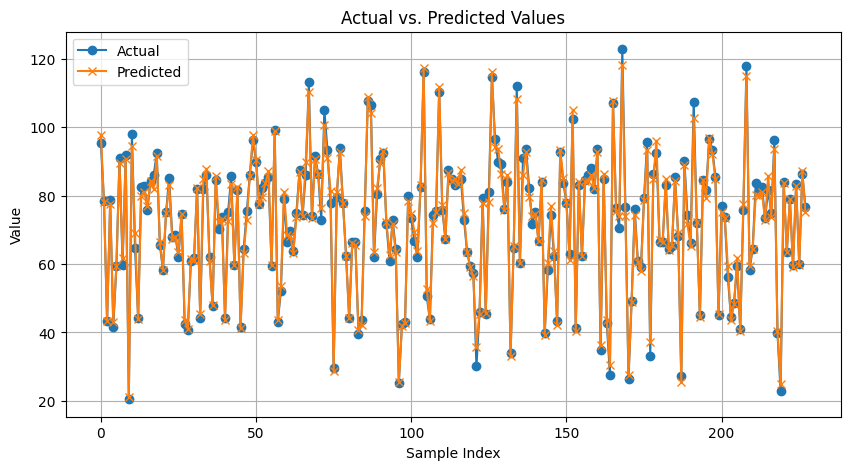

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False]
}

# Define the Randomized Search
random_search = RandomizedSearchCV(
    linear_reg,
    param_distributions=param_grid,
    n_iter=min(10, len(param_grid['fit_intercept'])),  # Ensure n_iter does not exceed grid size
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Check if the number of features in X_test matches the expectation
if X_test.shape[1] != X_train.shape[1]:
    raise ValueError(f"X_test has {X_test.shape[1]} features, expected {X_train.shape[1]}")

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}%')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS4.xlsx', index=False)



Best LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 1.7596987894107066
MAE: 1.3371022466716624
MAD: 1.3371022466716624
MAPE: 1.9702678914468017
Best Parameters: {'fit_intercept': True}
Coefficients: [ 1.00655082 -0.03897769 -0.05938239  0.11159589 -0.14229191  0.0380535
  0.09921939 -0.04657878  0.07437852 -0.09599609  0.09058206 -0.0277284
 -0.00236955 -0.02478172  0.07499825 -0.04644202 -0.02667198 -0.00364368
  0.01362224  0.04434321 -0.06267242  0.02735765 -0.01551615 -0.03253439
  0.04316499 -0.06610731  0.10485869 -0.02060458  0.04687773 -0.07002439]
Intercept: 0.48721757670422505


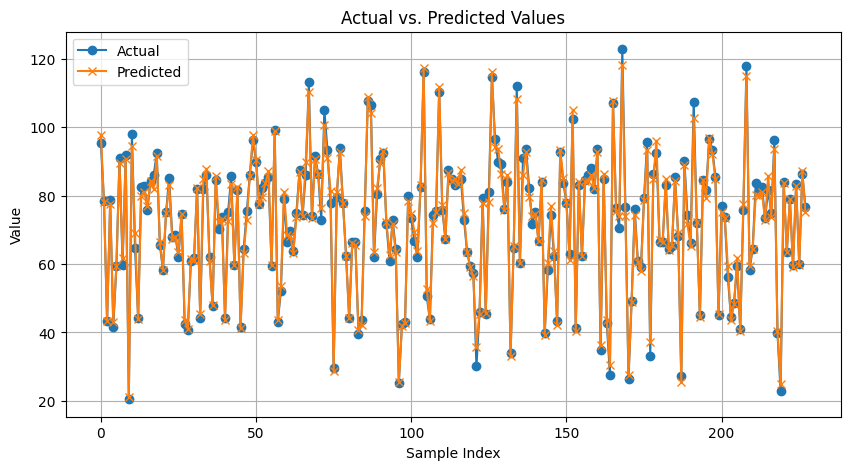

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined in your environment

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Print the coefficients of the best estimator
print("Coefficients:", best_estimator.coef_)

# If fit_intercept is True, also print the intercept
if best_estimator.fit_intercept:
    print("Intercept:", best_estimator.intercept_)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS4.xlsx', index=False)


# **Polynomial Regression**

Degree 1:
X_poly_train shape: (908, 31)
X_poly_test shape: (228, 31)
Degree 2:
X_poly_train shape: (908, 496)
X_poly_test shape: (228, 496)
Degree 3:
X_poly_train shape: (908, 5456)
X_poly_test shape: (228, 5456)
Degree 4:
X_poly_train shape: (908, 46376)
X_poly_test shape: (228, 46376)
Degree 5:
X_poly_train shape: (908, 324632)
X_poly_test shape: (228, 324632)
Best Polynomial degree: 1


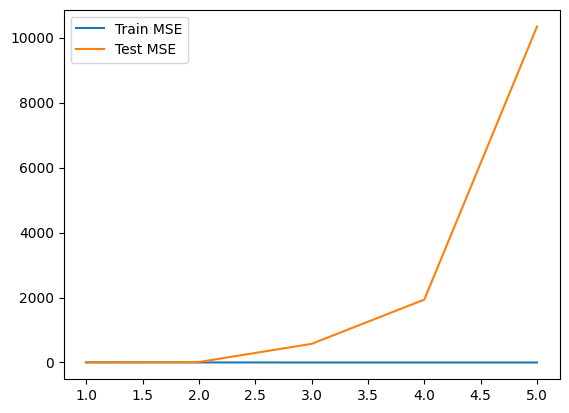

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_MSE = []
test_MSE = []

# Test lower degrees first
max_degree = 5  # Limit the maximum degree to avoid high memory usage
for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    print(f"Degree {degree}:")
    print("X_poly_train shape:", X_poly_train.shape)
    print("X_poly_test shape:", X_poly_test.shape)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    y_test_pred_LP = lin_reg.predict(X_poly_test)

    train_error = mean_squared_error(y_train, y_train_pred_LP)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    train_MSE.append(train_error)
    test_MSE.append(test_error)

print(f'Best Polynomial degree: {test_MSE.index(min(test_MSE)) + 1}')
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.legend()
plt.show()


# **with PCA**

Best Polynomial degree: 4


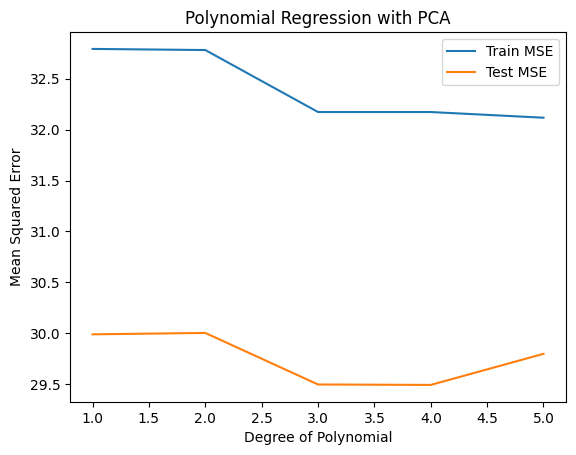

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Adjust this to your needs

# Apply PCA to the scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Store the train and test MSE for different polynomial degrees
train_MSE = []
test_MSE = []

# Define the maximum degree for polynomial features
max_degree = 5

# Loop over degrees to evaluate the model
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train_pca)
    X_poly_test = poly_features.transform(X_test_pca)

    # Fit a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Predict and evaluate on the training set
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    train_error = mean_squared_error(y_train, y_train_pred_LP)
    train_MSE.append(train_error)

    # Predict and evaluate on the test set
    y_test_pred_LP = lin_reg.predict(X_poly_test)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    test_MSE.append(test_error)

# Output the best degree based on test MSE
best_degree_index = test_MSE.index(min(test_MSE))
best_degree = range(1, max_degree + 1)[best_degree_index]
print(f'Best Polynomial degree: {best_degree}')

# Plot the train and test MSE
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression with PCA')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_LP))

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_LP)

# Calculate MAD (Median Absolute Deviation)
mad = median_absolute_error(y_test, y_test_pred_LP)

# Calculate MAPE - Note: y_test must not contain any zero values for this calculation
mape = np.mean(np.abs((y_test - y_test_pred_LP) / y_test)) * 100

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 5.458889229294907
MAE: 4.093590266357636
MAD: 3.311640568111656
MAPE: 6.854595611036496 %


Random search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint
import matplotlib.pyplot as plt

# Define a pipeline for scaling, PCA, and linear regression with polynomial features
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'pca__n_components': randint(1, X_train.shape[1]),  # Assuming X_train has been defined
    'poly__degree': randint(1, 6),  # Polynomial degree from 1 to 5
}

# Create a scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds in cross-validation
    scoring=mse_scorer,
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Make predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE for the predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output RMSE
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'pca__n_components': 12, 'poly__degree': 1}
Train RMSE: 2.212076403681996
Test RMSE: 1.9434241447896112


Best Polynomial

Test RMSE: 1.9434449538947844
Test MAE: 1.4847801597142019
Test MAD: 1.177243424225317
Test MAPE: 2.1949346268880143%


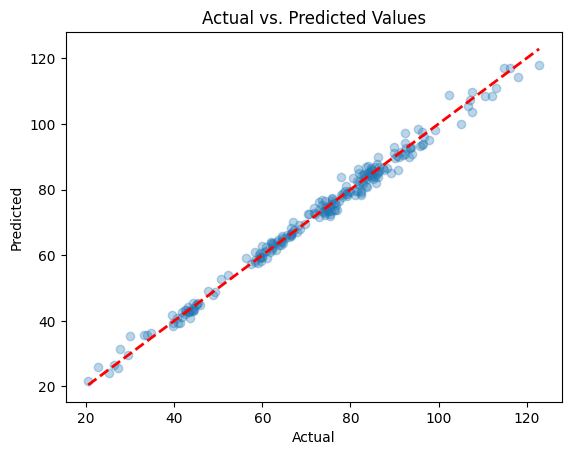

Results saved to Excel file: /content/Polynomial_regression_Results_DS4.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df is your DataFrame and it has been preprocessed appropriately
# X = df.drop(columns=['Y']).values
# y = df['Y'].values

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the number of components found to be best
pca = PCA(n_components=12)  # Best parameter from random search
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create polynomial features with the degree found to be best
poly_features = PolynomialFeatures(degree=1, include_bias=True)  # Best parameter from random search
X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict and evaluate on the test set
y_test_pred = lin_reg.predict(X_test_poly)

# Calculate evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mad = median_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAD: {test_mad}")
print(f"Test MAPE: {test_mape}%")

# Plot the actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Polynomial_regression_Results_DS4.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")



# **Gaussian Processes**

RMSE: 3.538
MAE: 2.105
MAD: 1.353
MAPE: 2.816%


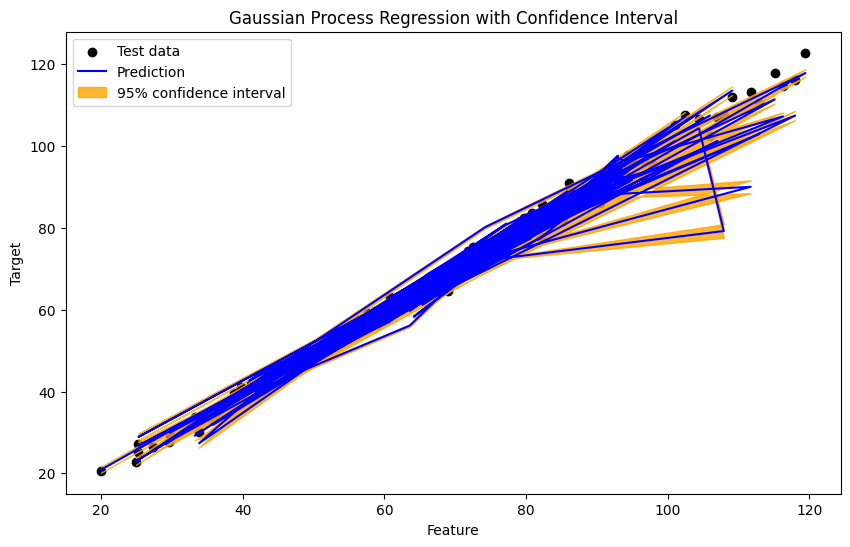

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Set up the kernel and Gaussian Process Regressor
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model
gp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB, sigma = gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse_GB = np.sqrt(mean_squared_error(y_test, y_pred_GB))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mad_GB = median_absolute_error(y_test, y_pred_GB)
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)

# Print the evaluation metrics
print(f'RMSE: {rmse_GB:.3f}')
print(f'MAE: {mae_GB:.3f}')
print(f'MAD: {mad_GB:.3f}')
print(f'MAPE: {mape_GB:.3f}%')

# Adjusted visualization of the confidence interval for visibility
confidence_factor = 1.96 * np.maximum(sigma, 0.01)  # Ensure a minimum visibility threshold

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, c='k', label='Test data')
plt.plot(X_test[:, 0], y_pred_GB, 'b-', label='Prediction')

# Plot the confidence interval with a minimum threshold for visibility
plt.fill_between(X_test[:, 0],
                 y_pred_GB - confidence_factor,
                 y_pred_GB + confidence_factor,
                 color='orange', alpha=0.8, label="95% confidence interval")

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gaussian Process Regression with Confidence Interval')
plt.legend(loc='upper left')
plt.show()






Random search

Random search

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the kernel with default parameters to optimize
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Setup Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel)

# Parameter distribution for Randomized Search
param_dist = {
    'kernel__k1__constant_value': uniform(0.1, 10.0),
    'kernel__k2__length_scale': uniform(0.1, 10.0),
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best score (neg_mean_squared_error):", best_score)

# Now let's use the best parameters to create a GaussianProcessRegressor model
optimal_kernel = C(best_params['kernel__k1__constant_value']) * RBF(best_params['kernel__k2__length_scale'])
optimal_gp = GaussianProcessRegressor(kernel=optimal_kernel, n_restarts_optimizer=9)

# Fit the model with the best kernel
optimal_gp.fit(X_train, y_train)

# Predictions
y_pred, sigma = optimal_gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.0s
Best parameters found: {'kernel__k1__constant_value': 1.6601864044243653, 'kernel__k2__length_scale': 1.6599452033620266}
Best score (neg_mean_squared_error): -15.454387318188273
Test RMSE: 2.760
Test MAE: 2.024


Best Gussian

Test RMSE: 2.3939966800462167
Test MAE: 1.7615691795841308
Test MAD: 1.1647713486355578
Test MAPE: 2.575021499002583%


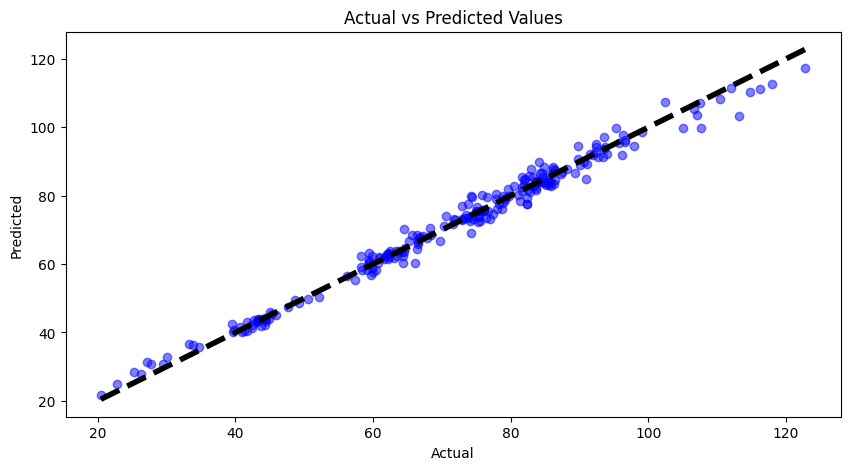

Results saved to Excel file: /content/Gaussian Process_Randomsearch_Results_DS4.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Adjust the bounds for the kernel parameters
constant_value = 1.6601864044243653
length_scale = 1.6599452033620266
kernel = C(constant_value, (1e-3, 1e6)) * RBF(length_scale, (1e-6, 1e3))

# Initialize Gaussian Process Regressor with the best kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit the model
gp.fit(X_train, y_train.ravel())

# Make predictions
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()  # Fit and transform training data
gp.fit(X_train, y_train_scaled)  # Fit model with scaled target

y_test_pred, sigma = gp.predict(X_test, return_std=True)
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

results_df = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted': y_test_pred,
    'Lower CI': y_test_pred - 1.96 * sigma,
    'Upper CI': y_test_pred + 1.96 * sigma
})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Gaussian Process_Randomsearch_Results_DS4.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")

# **Time Series**

ACF and PACF

Seasonal component: For seasonality to be present, we would expect to see regular patterns or cycles in the seasonal component of the decomposition plot. Based on the images , the seasonal component seems to be very close to zero throughout the entire series, which suggests there is no significant seasonality in your data.

ACF and PACF plots: If the data had a strong seasonal component, we would expect to see spikes at the seasonal lags in the ACF and PACF plots. For instance, if there was monthly seasonality, you might see spikes at lags 12, 24, 36, and so on. However, in the plots you shared, there are no such recurring spikes, further suggesting a lack of seasonality in your data..

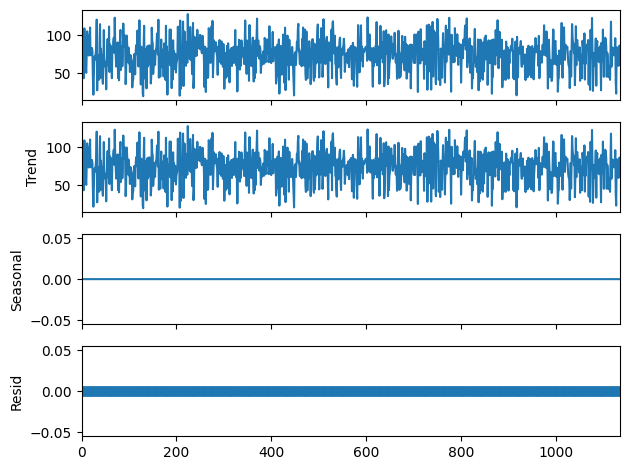

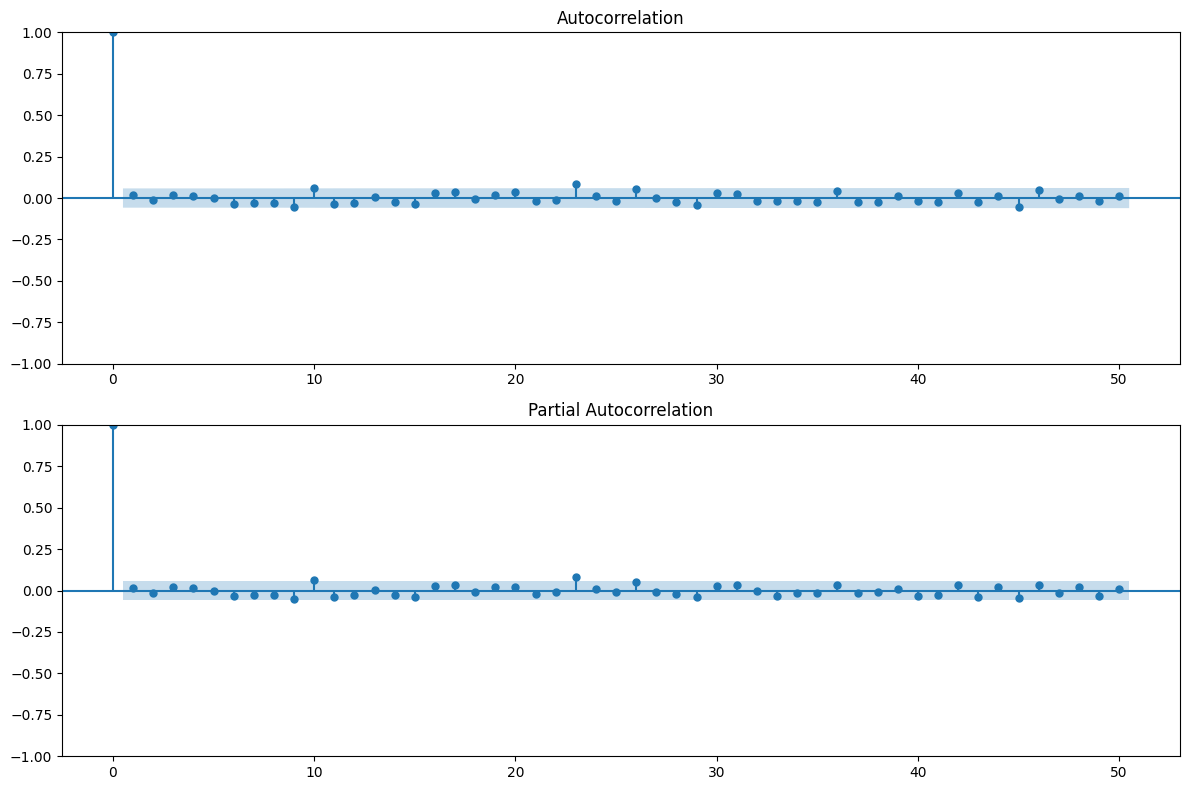

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = np.concatenate((y_train, y_test))

# Flatten the array to make it 1-dimensional
y = y.flatten()

# Convert to pandas Series (if not already in this format)
y_series = pd.Series(y)

# Decompose the combined time series
# Note: The period should be replaced with the expected seasonality period of your data (e.g., 12 for monthly data)
decomposition_result = seasonal_decompose(y_series, model='additive', period=1)  # Modify 'period' accordingly

# Plot the decomposed components of the time series
decomposition_result.plot()
plt.show()

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF
plot_acf(y_series, ax=ax1, lags=50)  # Modify the lags if necessary

# Plot the PACF
plot_pacf(y_series, ax=ax2, lags=50)  # Modify the lags if necessary

plt.tight_layout()
plt.show()

Movin Average

univariate

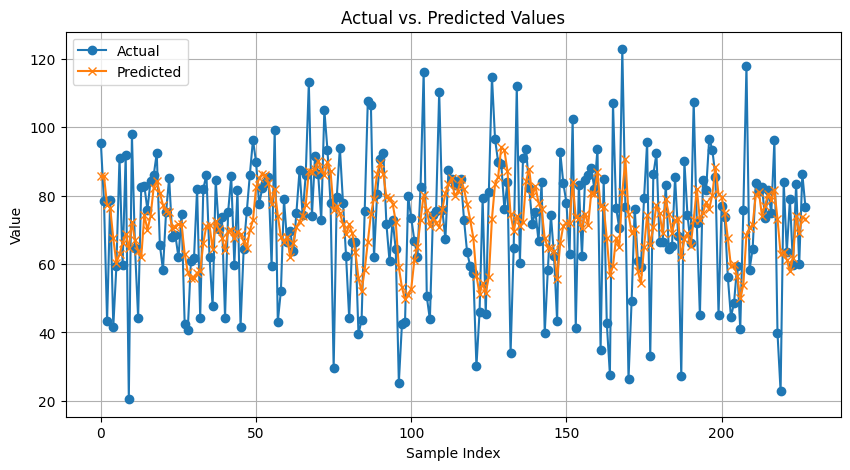

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Compute the moving average of the data with a specified window size."""
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""
    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]



# Let's assume y_train and y_test are defined
window_size = 5
y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the plot function to visualize the results
plot_predictions(y_test, y_pred_ma)

# Ensure y_train and y_test are correct
# Example: y_train = np.random.rand(100)
# Example: y_test = np.random.rand(20)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))  # Same as MAE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in percentage

    return rmse, mae, mad, mape

# Example usage
rmse, mae, mad, mape = calculate_metrics(y_test, y_pred_ma)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 17.691992437853138
MAE: 13.50382456140351
MAD: 13.50382456140351
MAPE: 23.710971390177406 %


Random search

Window Size 14, RMSE: 19.704
Window Size 15, RMSE: 19.706
Window Size 18, RMSE: 19.586
Window Size 9, RMSE: 19.436
Window Size 18, RMSE: 19.586
Window Size 10, RMSE: 19.634
Window Size 13, RMSE: 19.810
Window Size 7, RMSE: 18.959
Window Size 13, RMSE: 19.810
Window Size 19, RMSE: 19.540
Window Size 10, RMSE: 19.634
Window Size 2, RMSE: 13.646
Window Size 5, RMSE: 17.692
Window Size 13, RMSE: 19.810
Window Size 20, RMSE: 19.552
Window Size 12, RMSE: 19.709
Window Size 7, RMSE: 18.959
Window Size 11, RMSE: 19.558
Window Size 17, RMSE: 19.698
Window Size 2, RMSE: 13.646
Window Size 7, RMSE: 18.959
Window Size 18, RMSE: 19.586
Window Size 8, RMSE: 19.298
Window Size 18, RMSE: 19.586
Window Size 16, RMSE: 19.793
Window Size 14, RMSE: 19.704
Window Size 11, RMSE: 19.558
Window Size 3, RMSE: 16.426
Window Size 9, RMSE: 19.436
Window Size 11, RMSE: 19.558
Window Size 14, RMSE: 19.704
Window Size 20, RMSE: 19.552
Window Size 7, RMSE: 18.959
Window Size 18, RMSE: 19.586
Window Size 3, RMSE: 16.4

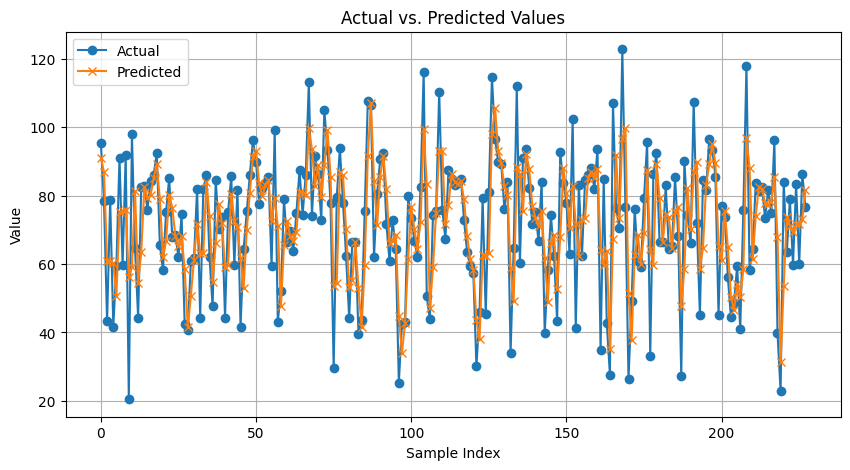

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train."""
    # Flatten the input arrays to ensure they are one-dimensional
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)

    # Combine train and test for the moving average calculation, then just take the last len(y_test) predictions
    full_series = np.concatenate([y_train_flat, y_test_flat])
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test_flat):]


# Assuming y_train and y_test are numpy arrays
# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Predict using the randomly chosen window size
    y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

    # Ensure prediction length matches y_test length for fair comparison
    y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))

    # Update best score and window size if the current RMSE is lower
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.3f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.3f}')

# Once the best window size is found, plot predictions with the best window size
y_pred_ma_best = predict_with_moving_average(y_train, y_test, best_window_size)
plot_predictions(y_test, y_pred_ma_best)


Best Moving Average

Best Window Size: 2
RMSE: 13.646
MAE: 10.659
MAD: 10.659
MAPE: 17.861%


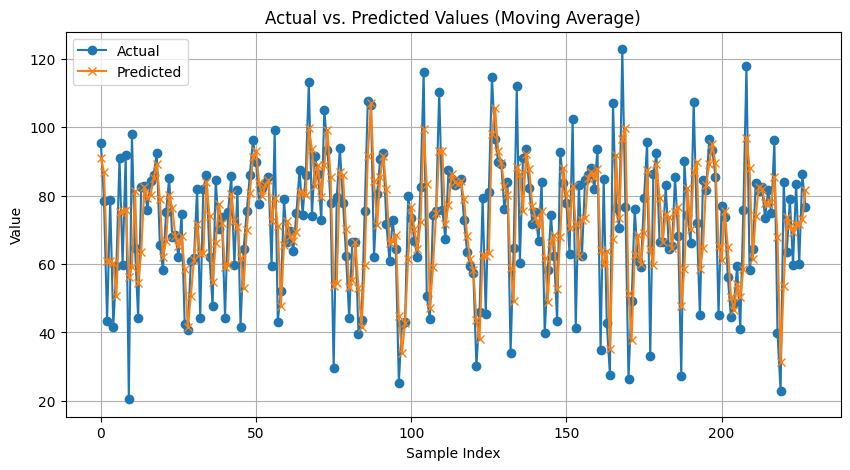

Results saved to Excel file: moving_average_uni_results_DS4.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""

    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]

# Assuming y_train and y_test are numpy arrays
best_window_size = 2  # From your random search results

# Predict using the best window size
y_pred_ma = predict_with_moving_average(y_train, y_test, best_window_size)

# Ensure prediction length matches y_test length for fair comparison
y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))
mae = mean_absolute_error(y_test_adjusted, y_pred_ma)
mad = np.mean(np.abs(y_test_adjusted - y_pred_ma))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test_adjusted - y_pred_ma) / y_test_adjusted)) * 100  # MAPE in percentage

print(f"Best Window Size: {best_window_size}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


plt.figure(figsize=(10, 5))
plt.plot(y_test_adjusted, label='Actual', marker='o')
plt.plot(y_pred_ma, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (Moving Average)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_uni_results_DS4.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


multivariate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Calculate moving averages for each feature
window_size = 5
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")




RMSE: 17.98
MAE: 13.74
MAD: 13.74
MAPE: 24.10%


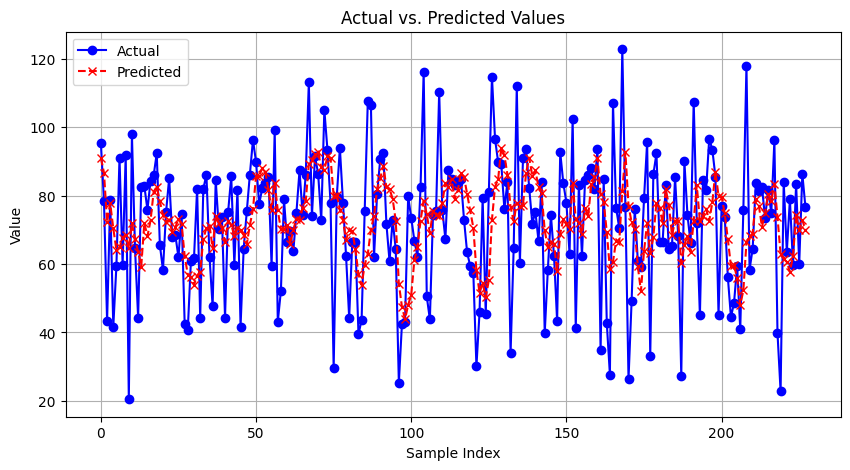

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assume y_test and y_pred are already defined from your model predictions
plot_predictions(y_test, y_pred)


Random search

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Calculate moving averages for each feature using the random window size
    for feature in feature_names:
        X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
        X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

    # Select only the moving average columns for modeling
    X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
    X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_MA, y_train)

    # Make predictions
    y_pred = model.predict(X_test_MA)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Update best score and window size
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.2f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.2f}')


Window Size 15, RMSE: 19.81
Window Size 12, RMSE: 19.83
Window Size 17, RMSE: 19.86
Window Size 14, RMSE: 19.89
Window Size 15, RMSE: 19.81
Window Size 13, RMSE: 19.79
Window Size 6, RMSE: 18.67
Window Size 19, RMSE: 19.60
Window Size 2, RMSE: 13.97
Window Size 11, RMSE: 19.71
Window Size 3, RMSE: 16.81
Window Size 6, RMSE: 18.67
Window Size 12, RMSE: 19.83
Window Size 3, RMSE: 16.81
Window Size 5, RMSE: 17.98
Window Size 6, RMSE: 18.67
Window Size 13, RMSE: 19.79
Window Size 19, RMSE: 19.60
Window Size 4, RMSE: 17.23
Window Size 16, RMSE: 19.99
Window Size 11, RMSE: 19.71
Window Size 10, RMSE: 19.73
Window Size 8, RMSE: 19.49
Window Size 5, RMSE: 17.98
Window Size 7, RMSE: 19.18
Window Size 16, RMSE: 19.99
Window Size 18, RMSE: 19.65
Window Size 20, RMSE: 19.66
Window Size 18, RMSE: 19.65
Window Size 15, RMSE: 19.81
Window Size 7, RMSE: 19.18
Window Size 18, RMSE: 19.65
Window Size 6, RMSE: 18.67
Window Size 20, RMSE: 19.66
Window Size 19, RMSE: 19.60
Window Size 11, RMSE: 19.71
Windo

Best MA Multi

RMSE: 13.97
MAE: 10.92
MAD: 10.92
MAPE: 18.20%


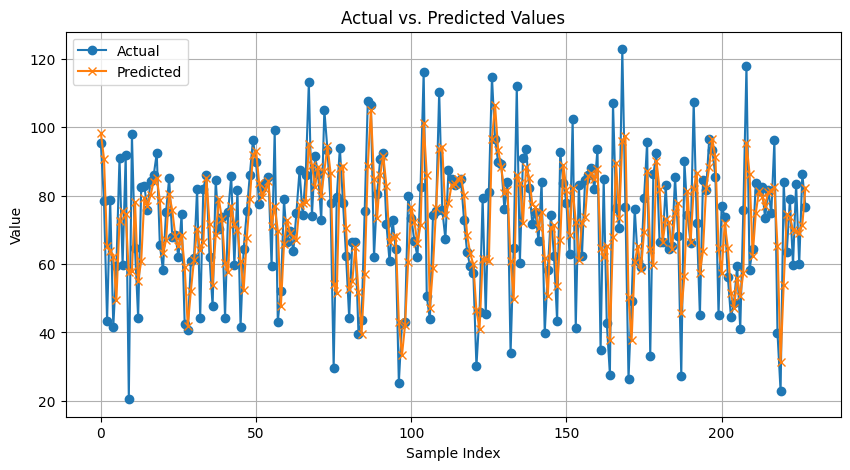

Results saved to Excel file: moving_average_Multi_results_DS4.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use the best window size found from the random search
best_window_size = 2

# Calculate moving averages for each feature using the best window size
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=best_window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=best_window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_Multi_results_DS4.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


# **Arima**

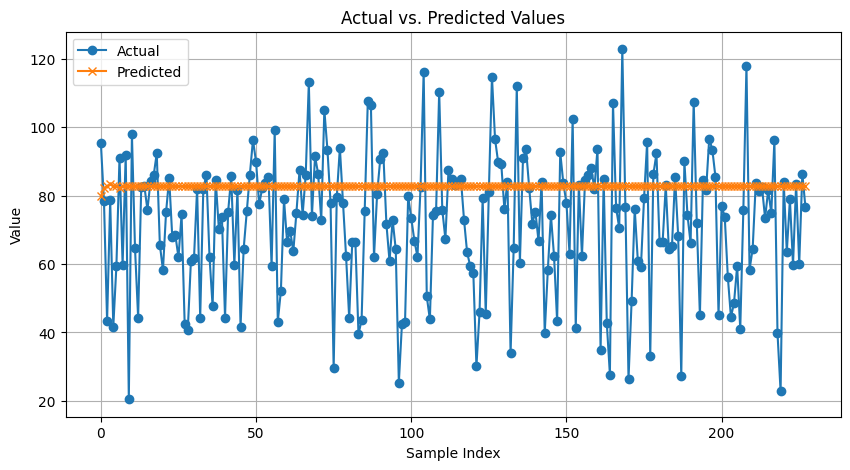

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming y_train and y_test are defined and are numpy arrays
# You might need to adjust these data as pandas Series if needed

# Fit an ARIMA model
# p (periods to lag for autoregressive model), d (degree of differencing), q (size of moving average window)
p, d, q = 5, 1, 0  # These are example parameters that you might need to tune for your dataset
model = ARIMA(y_train, order=(p, d, q))
fitted_model = model.fit()

# Predict
# Start and end indices to predict in the test set
start_index = len(y_train)
end_index = start_index + len(y_test) - 1
y_pred_arima = fitted_model.predict(start=start_index, end=end_index, dynamic=True)

# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions
plot_predictions(y_test, y_pred_arima)


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_arima)
print(f'MAE: {mae}')

# Calculate MAD
mad = np.mean(np.abs(y_pred_arima - y_test))
print(f'MAD: {mad}')

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_arima)
print(f'MAPE: {mape}')


RMSE: 22.6849330843012
MAE: 17.066030388440378
MAD: 17.066030388440378
MAPE: 34.08966559081346


Random search

ARIMA(1, 0, 3) RMSE=20.144
ARIMA(3, 1, 1) RMSE=20.162
ARIMA(1, 1, 1) RMSE=20.161


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 5) RMSE=20.160
ARIMA(0, 1, 5) RMSE=20.157
ARIMA(5, 1, 0) RMSE=22.685
ARIMA(2, 0, 0) RMSE=20.144
ARIMA(2, 1, 2) RMSE=20.166
ARIMA(1, 2, 0) RMSE=208.751
ARIMA(3, 2, 1) RMSE=24.686


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=20.416
ARIMA(2, 1, 0) RMSE=23.913
ARIMA(1, 1, 2) RMSE=20.168
ARIMA(2, 0, 4) RMSE=20.140
ARIMA(1, 1, 0) RMSE=24.046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) RMSE=20.146
ARIMA(3, 0, 4) RMSE=20.132
ARIMA(4, 0, 3) RMSE=20.133
ARIMA(0, 0, 3) RMSE=20.144
ARIMA(4, 2, 1) RMSE=24.382
ARIMA(5, 0, 3) RMSE=20.146


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 4) RMSE=21.336
ARIMA(2, 0, 4) RMSE=20.140


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 5) RMSE=20.178


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 5) RMSE=20.440


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) RMSE=21.224
ARIMA(1, 0, 3) RMSE=20.144


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 3) RMSE=20.464


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 3) RMSE=20.461


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 2) RMSE=20.461
ARIMA(1, 2, 1) RMSE=25.676


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 4) RMSE=21.224
ARIMA(0, 2, 4) RMSE=20.409
ARIMA(3, 0, 1) RMSE=20.144


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=20.416
ARIMA(5, 1, 2) RMSE=20.169
ARIMA(4, 0, 2) RMSE=20.133


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) RMSE=20.367


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 3) RMSE=20.110
ARIMA(4, 1, 2) RMSE=20.170
ARIMA(2, 0, 4) RMSE=20.140


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 4) RMSE=20.213
ARIMA(1, 1, 1) RMSE=20.161
ARIMA(5, 1, 1) RMSE=20.155
ARIMA(0, 2, 0) RMSE=599.585
ARIMA(1, 1, 0) RMSE=24.046
ARIMA(0, 1, 3) RMSE=20.161


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) RMSE=20.105


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) RMSE=20.140
ARIMA(4, 2, 0) RMSE=387.011


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) RMSE=20.367
ARIMA(3, 0, 4) RMSE=20.132
ARIMA(0, 0, 3) RMSE=20.144
ARIMA(5, 0, 0) RMSE=20.147
ARIMA(0, 1, 4) RMSE=20.163
ARIMA(5, 1, 0) RMSE=22.685
ARIMA(4, 0, 0) RMSE=20.145
ARIMA(0, 0, 5) RMSE=20.147


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 3) RMSE=20.461


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) RMSE=20.164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) RMSE=20.109
ARIMA(4, 2, 0) RMSE=387.011


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 4) RMSE=20.345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 1) RMSE=23.801
ARIMA(2, 2, 1) RMSE=25.386


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 5) RMSE=20.138
ARIMA(1, 2, 5) RMSE=20.464


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) RMSE=20.367


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 5) RMSE=20.440
ARIMA(0, 1, 3) RMSE=20.161
ARIMA(0, 1, 0) RMSE=24.892
ARIMA(0, 0, 1) RMSE=20.144
ARIMA(2, 0, 1) RMSE=20.144
ARIMA(4, 0, 0) RMSE=20.145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) RMSE=20.164
ARIMA(1, 2, 2) RMSE=20.461
ARIMA(2, 0, 3) RMSE=20.154
ARIMA(4, 2, 0) RMSE=387.011
ARIMA(0, 0, 4) RMSE=20.145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 5) RMSE=20.139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) RMSE=20.164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 3) RMSE=24.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) RMSE=20.146
ARIMA(1, 0, 1) RMSE=20.144


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 2) RMSE=24.389
ARIMA(5, 0, 0) RMSE=20.147
ARIMA(0, 2, 0) RMSE=599.585
ARIMA(3, 2, 1) RMSE=24.686


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 4) RMSE=20.409
ARIMA(0, 1, 1) RMSE=20.161
ARIMA(1, 0, 2) RMSE=20.144
ARIMA(4, 1, 2) RMSE=20.170
ARIMA(1, 1, 5) RMSE=20.170
ARIMA(2, 2, 1) RMSE=25.386


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 4) RMSE=20.140
ARIMA(3, 2, 2) RMSE=20.394


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) RMSE=20.477
ARIMA(3, 2, 0) RMSE=245.355
ARIMA(3, 2, 3) RMSE=20.461
ARIMA(4, 0, 1) RMSE=20.146
Best ARIMA(1, 0, 4) RMSE=20.105


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


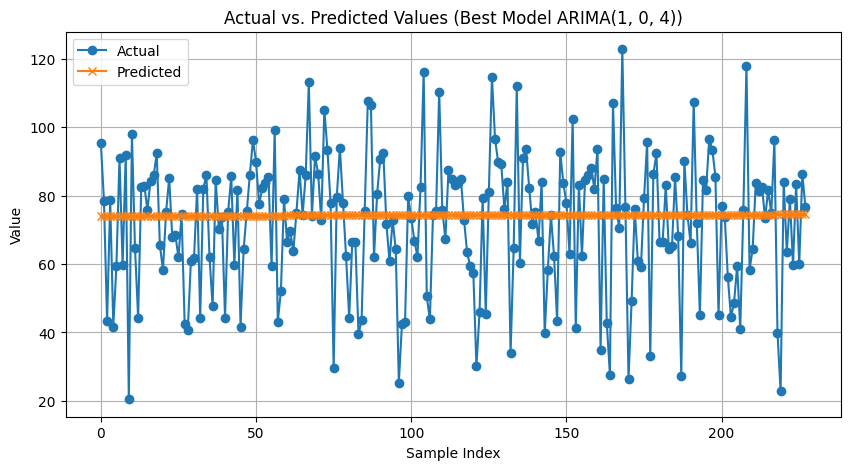

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

# Assuming y_train and y_test are numpy arrays or pandas Series

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # Define how many iterations you'd like to perform

best_score, best_order = float("inf"), None

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)
    try:
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
        error = mean_squared_error(y_test, predictions, squared=False)
        if error < best_score:
            best_score, best_order = error, order
        print(f'ARIMA{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'ARIMA{order} encountered an error: {e}')
        continue

print(f'Best ARIMA{best_order} RMSE={best_score:.3f}')

# Fit the best ARIMA model found via random search
best_model = ARIMA(y_train, order=best_order)
best_model_fit = best_model.fit()
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best Model ARIMA{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best Model ARIMA(1,0,4)
RMSE: 20.105
MAE: 15.698
MAD: 15.698
MAPE: 29.022%


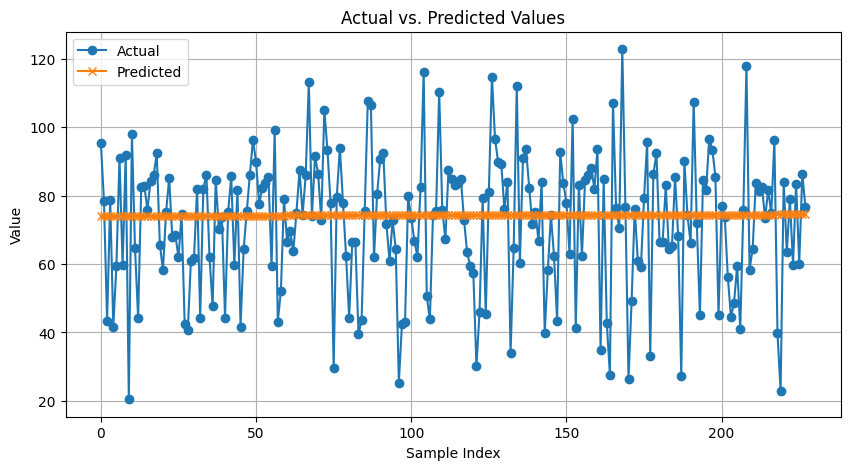

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are defined as numpy arrays or pandas Series

# Best model parameters from the grid search
best_p, best_d, best_q = 1, 0, 4

# Fit the best ARIMA model
best_model = ARIMA(y_train, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate various error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
mad = np.mean(np.abs(y_test - y_pred_best))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100  # MAPE

print(f'Best Model ARIMA({best_p},{best_d},{best_q})')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAD: {mad:.3f}')
print(f'MAPE: {mape:.3f}%')


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# # Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
results_df.to_excel('Arima_Uni_Results_DS4.xlsx', index=False)


Arima Multivariate

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, X_test, y_train, y_test are predefined and are numpy arrays
# The feature_names list is assumed to be already defined as you've indicated

# Best SARIMAX model parameters found from the search (update these values accordingly)
best_p, best_d, best_q = 4, 2, 5

# Fit the best SARIMAX model with the exogenous variables
best_sarimax_model = SARIMAX(y_train, order=(best_p, best_d, best_q), exog=X_train)
best_sarimax_model_fit = best_sarimax_model.fit(disp=False)

# Make predictions including the exogenous variables
y_pred_sarimax = best_sarimax_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, typ='levels')

# Calculate RMSE, MAE, MAD, and MAPE
rmse_sarimax = np.sqrt(mean_squared_error(y_test, y_pred_sarimax))
mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
mad_sarimax = np.mean(np.abs(y_test - y_pred_sarimax))  # Mean Absolute Deviation
mape_sarimax = np.mean(np.abs((y_test - y_pred_sarimax) / y_test)) * 100  # MAPE in percentage

print(f"SARIMAX({best_p},{best_d},{best_q}) RMSE: {rmse_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAE: {mae_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAD: {mad_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAPE: {mape_sarimax:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(4,2,5) RMSE: 1.77
SARIMAX(4,2,5) MAE: 1.36
SARIMAX(4,2,5) MAD: 1.36
SARIMAX(4,2,5) MAPE: 2.02%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


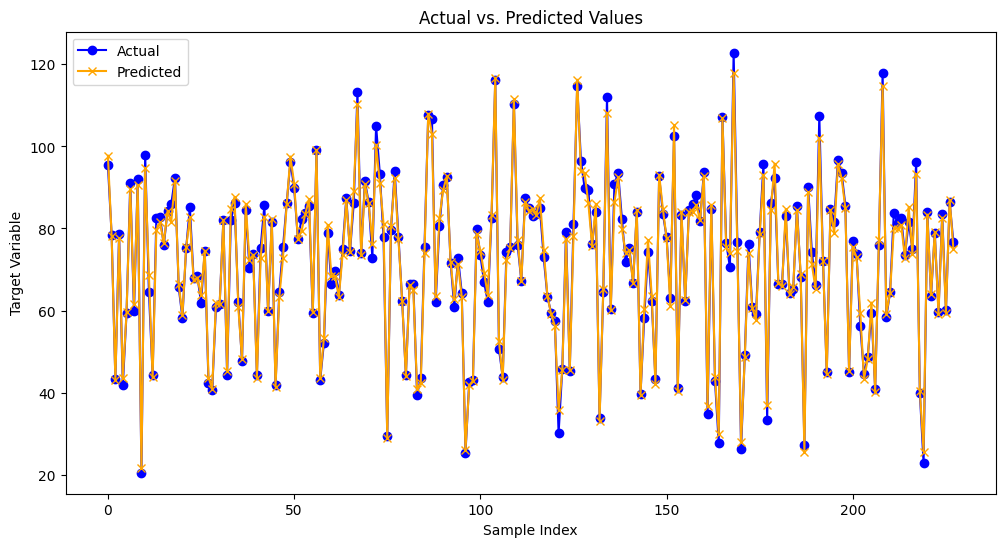

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(y_pred_sarimax, label='Predicted', color='orange', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 0) RMSE=441.140


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=2.903


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 2) RMSE=1.824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=1.751
Random Search SARIMAX(5, 0, 2) RMSE=1.748


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 0) RMSE=1.794


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 1) RMSE=1.761


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 0) RMSE=173.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 3) RMSE=1.806


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=1.784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 3) RMSE=1.760
Random Search SARIMAX(0, 0, 0) RMSE=1.745
Random Search SARIMAX(1, 0, 0) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 4) RMSE=1.749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 1) RMSE=1.897
Random Search SARIMAX(0, 0, 1) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=1.807


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=1.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 1) RMSE=1.838


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 4) RMSE=1.768


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 4) RMSE=1.767


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 0) RMSE=173.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 5) RMSE=1.766


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 2) RMSE=1.924


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=1.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 2) RMSE=1.747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=1.793


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=1.807


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 3) RMSE=1.775


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=2.903
Random Search SARIMAX(0, 0, 0) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 1) RMSE=1.762
Random Search SARIMAX(1, 0, 0) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 0) RMSE=1.954


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 2) RMSE=1.746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 3) RMSE=1.746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 3) RMSE=1.746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 3) RMSE=1.749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 5) RMSE=1.759


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 5) RMSE=1.756


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 5) RMSE=1.763


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=1.765


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 5) RMSE=1.765
Random Search SARIMAX(0, 2, 4) RMSE=1.781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=1.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 3) RMSE=1.758


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 1) RMSE=1.761


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 3) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 2) RMSE=1.824
Random Search SARIMAX(0, 2, 4) RMSE=1.781
Random Search SARIMAX(0, 0, 5) RMSE=1.749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 4) RMSE=1.782


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 3) RMSE=1.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 0) RMSE=59.614


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 2) RMSE=2.043


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 5) RMSE=1.755


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 5) RMSE=1.756


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=1.774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 2) RMSE=1.769


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 1) RMSE=1.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 0) RMSE=1.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 1) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 0) RMSE=441.140


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 0) RMSE=190.197


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 0) RMSE=13.607


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=1.765


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 5) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 4) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=1.793


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 3) RMSE=1.861


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 5) RMSE=1.765


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=1.790


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=1.784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 2) RMSE=1.769
Random Search SARIMAX(5, 0, 2) RMSE=1.748


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 5) RMSE=1.768
Random Search SARIMAX(2, 0, 0) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 4) RMSE=1.780


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 3) RMSE=1.758


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 3) RMSE=1.746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 3) RMSE=1.760


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 3) RMSE=1.758
Random Search SARIMAX(2, 0, 0) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 5) RMSE=1.768


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 3) RMSE=1.751


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 3) RMSE=1.749
Random Search SARIMAX(2, 2, 5) RMSE=1.749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 4) RMSE=1.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 5) RMSE=1.768


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=1.750
Random Search SARIMAX(0, 0, 1) RMSE=1.745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=1.763


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 2) RMSE=1.746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 0) RMSE=173.827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 2) RMSE=1.762


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 4) RMSE=1.766


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 1) RMSE=1.762


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 3) RMSE=1.806


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 0) RMSE=1.827
Best SARIMAX(0, 0, 1) RMSE=1.745


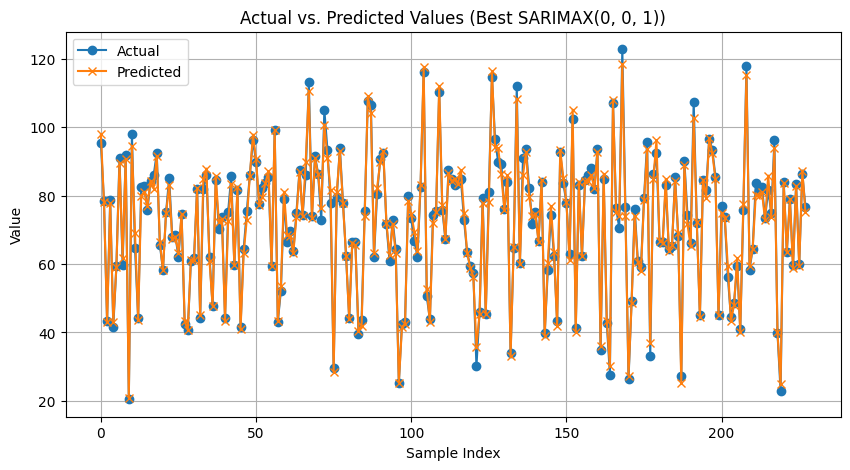

In [ ]:
import numpy as np
import pandas as pd
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are predefined numpy arrays
# Assuming feature_names is a list with your feature names

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # or any other number of iterations you want

best_score, best_order = float("inf"), None
best_params = {}

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)

    try:
        # Fit the SARIMAX model (include exogenous variables if available)
        model = SARIMAX(y_train, exog=X_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Predict (include exogenous variables if available)
        y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

        # Calculate the error
        error = mean_squared_error(y_test, y_pred, squared=False)

        # Compare and store the best score
        if error < best_score:
            best_score, best_order = error, order
            best_params = {'p': p, 'd': d, 'q': q}

        print(f'Random Search SARIMAX{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'Error with SARIMAX{order}: {e}')
        continue

print(f'Best SARIMAX{best_order} RMSE={best_score:.3f}')

# Fit the best SARIMAX model found via random search
best_model = SARIMAX(y_train, exog=X_train, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
best_model_fit = best_model.fit(disp=False)

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best SARIMAX{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima for multivariate

RMSE: 1.745
MAE: 1.339
MAD: 1.339
MAPE: 1.966%


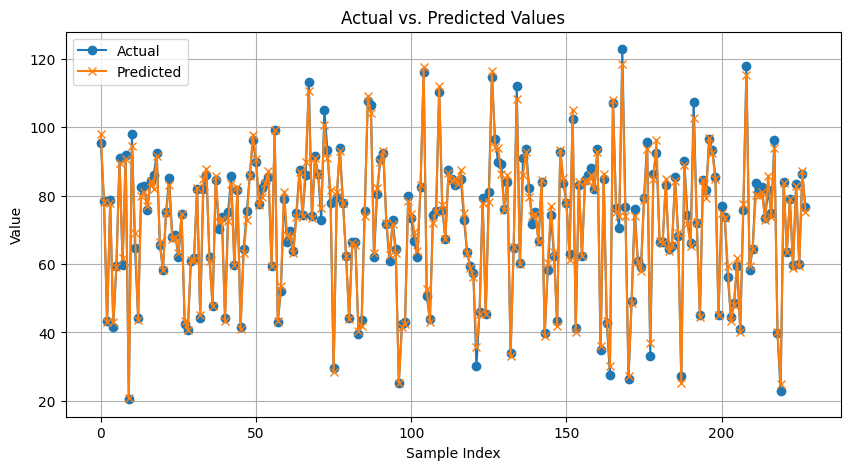

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are numpy arrays or pandas Series
# Assuming X_train and X_test are numpy arrays or pandas DataFrames corresponding to exogenous variables

# Best model parameters identified
p, d, q = 0, 0, 1

# Fit the SARIMAX model using the best parameters
model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions using the fitted model
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

# Print the error metrics
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Arima_Multi_results_DS4.xlsx', index=False)

# **Stacking**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value

RMSE: 1.7164466921783
MAE: 1.3093436062337942
MAD: 0.9830987304710028
R-squared: 0.9926190497174149


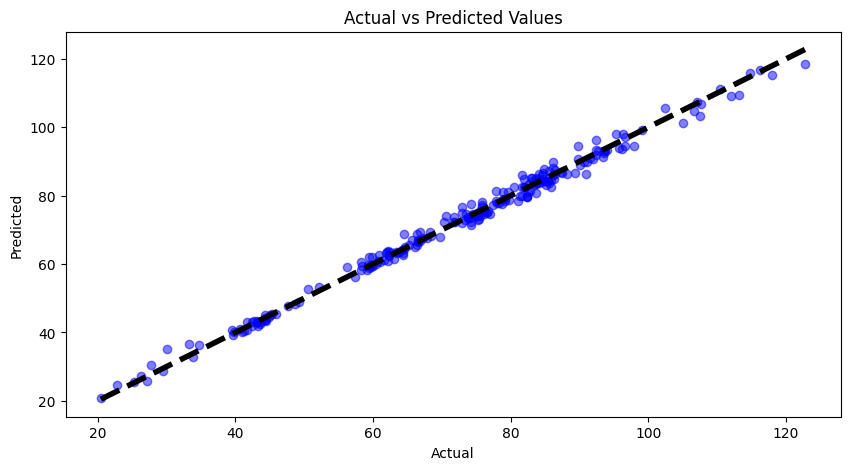

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define custom regressor for SARIMAX
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Define custom regressor for Polynomial Regression
class CustomPolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2):
        self.degree = degree

    def fit(self, X, y):
        self.model = make_pipeline(PolynomialFeatures(degree=self.degree), LinearRegression())
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create Gaussian Process Model
kernel = C(1.66, (1e-2, 1e2)) * RBF(1.65, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(1, 0, 1))
poly_model = CustomPolynomialRegression(degree=2)
lr_model = LinearRegression()

# Define the stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_DS4.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



with PCA

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value

RMSE: 1.713653702729337
MAE: 1.2977956752905997
MAD: 1.000834239016104
R-squared: 0.9926430506306227


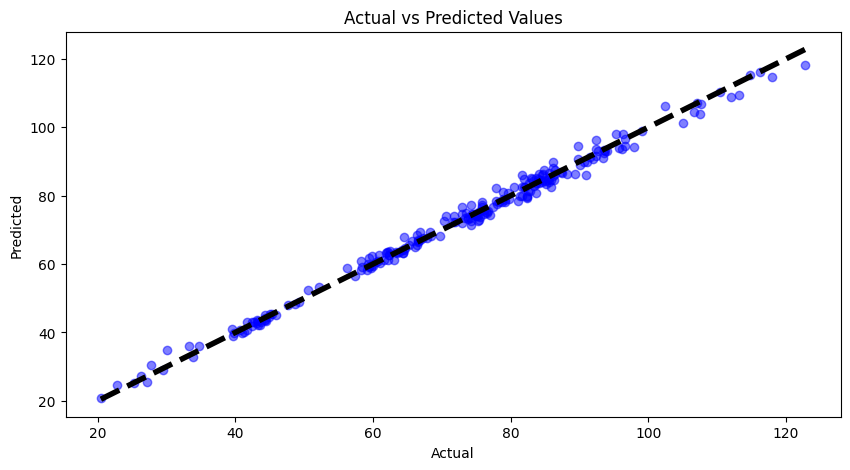

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Custom SARIMAX model as before
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Custom Polynomial Regression with PCA
class CustomPCA_PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2, n_components=None):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = Pipeline([
            ('pca', PCA(n_components=self.n_components)),
            ('poly', PolynomialFeatures(degree=self.degree)),
            ('linear', LinearRegression())
        ])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Gaussian Process Model
kernel = C(1.66, (1e-2, 1e2)) * RBF(1.65, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(1, 0, 1))
poly_model = CustomPCA_PolynomialRegression(degree=2, n_components=10)
lr_model = LinearRegression()

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)



plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_with PCA_DS4.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


### ***Machine Learning model ***

# **KNN**

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


n_neighbors = [3, 5, 7, 9, 11, 13, 15, 17]
scores = {}

for n_neighbor in n_neighbors:
    # Initialize and train regressor
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test, y_pred_knn)
    mad = median_absolute_error(y_test, y_pred_knn)
    mape = mean_absolute_percentage_error(y_test, y_pred_knn)

    # Store results in dictionary
    scores[n_neighbor] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for k, v in scores.items():
    print(f"Number of Neighbors: {k}")
    for score_name, score_value in v.items():
        print(f"{score_name}: {score_value:.2f}")
    print("")  # Newline for better readability


Number of Neighbors: 3
RMSE: 1.87
MAE: 1.28
MAD: 0.83
MAPE: 1.81

Number of Neighbors: 5
RMSE: 2.25
MAE: 1.58
MAD: 1.02
MAPE: 2.21

Number of Neighbors: 7
RMSE: 2.47
MAE: 1.79
MAD: 1.27
MAPE: 2.48

Number of Neighbors: 9
RMSE: 2.68
MAE: 1.95
MAD: 1.33
MAPE: 2.75

Number of Neighbors: 11
RMSE: 2.79
MAE: 2.07
MAD: 1.55
MAPE: 3.04

Number of Neighbors: 13
RMSE: 2.91
MAE: 2.15
MAD: 1.57
MAPE: 3.19

Number of Neighbors: 15
RMSE: 3.00
MAE: 2.22
MAD: 1.75
MAPE: 3.35

Number of Neighbors: 17
RMSE: 3.11
MAE: 2.27
MAD: 1.70
MAPE: 3.50



Random search

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd

# Define a function for MAPE as it's not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter range for RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(1, 31),  # Let's say we're testing n_neighbors between 1 and 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Create a KNN regressor object
knn = KNeighborsRegressor()

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,  # Adjust based on how many iterations you want to perform
    scoring='neg_mean_squared_error',  # Negative MSE for optimization
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


Best KNN

RMSE: 1.6664234449576232
MAE: 1.1594660060861586
MAD: 0.8231235170733626
MAPE: None%


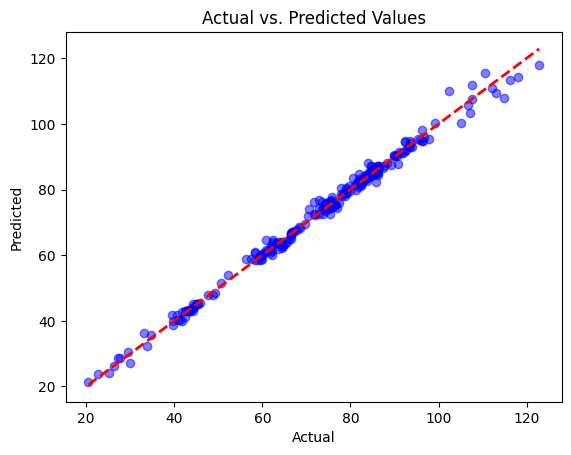

Results have been saved to Excel file 'KNN_Results_DS4.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure the inputs are arrays to prevent unexpected 'scalar' behavior
    y_true, y_pred = np.array(y_true, ndmin=1), np.array(y_pred, ndmin=1)

    # Check if any of the arrays is unexpectedly scalar or zero-dimensional
    if y_true.ndim == 0 or y_pred.ndim == 0:
        raise ValueError("Input arrays should be one-dimensional or higher.")

    # Avoid division by zero
    mask = y_true != 0
    if not np.any(mask):  # If all values are zero, return NaN to avoid invalid calculations
        return np.nan




# Create KNN regressor with the best parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# Fit KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the validation set
y_test_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, v)

# Output the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('KNN_Results_DS4.xlsx', index=False)

print("Results have been saved to Excel file 'KNN_Results_DS4.xlsx'.")


# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Parameters for Decision Tree
max_depths = [3, 5, 7, 9, 11, 13, 15, 17]  # Example max_depths, typically used to prevent overfitting
scores = {}

for max_depth in max_depths:
    # Initialize and train regressor
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test, y_pred_dt)
    mad = median_absolute_error(y_test, y_pred_dt)
    mape = mean_absolute_percentage_error(y_test, y_pred_dt)

    # Store results in dictionary
    scores[max_depth] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for depth, vals in scores.items():
    print(f"Max Depth: {depth}")
    for metric_name, metric_value in vals.items():
        print(f"{metric_name}: {metric_value:.2f}")
    print("")  # Newline for better readability


Max Depth: 3
RMSE: 3.67
MAE: 2.83
MAD: 2.27
MAPE: 4.44

Max Depth: 5
RMSE: 2.07
MAE: 1.54
MAD: 1.16
MAPE: 2.41

Max Depth: 7
RMSE: 2.30
MAE: 1.63
MAD: 1.29
MAPE: 2.43

Max Depth: 9
RMSE: 2.37
MAE: 1.68
MAD: 1.33
MAPE: 2.54

Max Depth: 11
RMSE: 2.44
MAE: 1.74
MAD: 1.28
MAPE: 2.59

Max Depth: 13
RMSE: 2.44
MAE: 1.71
MAD: 1.38
MAPE: 2.56

Max Depth: 15
RMSE: 2.57
MAE: 1.77
MAD: 1.25
MAPE: 2.64

Max Depth: 17
RMSE: 2.25
MAE: 1.62
MAD: 1.17
MAPE: 2.45



Random Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the parameter distributions to sample from
param_dist = {
    'max_depth': randint(3, 20),  # Depths from 3 to 20
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 20)   # Minimum number of samples required at each leaf node
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mad = median_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 17}
RMSE: 2.112865206902395
MAE: 1.5652806908249552
MAD: 1.2252661064425752
MAPE: 2.479258455686868%


Best Decision tree

Test RMSE: 2.112865206902396
Test MAE: 1.5652806908249564
Test MAD: 1.2252661064425823
Test MAPE: 2.4792584556868684%


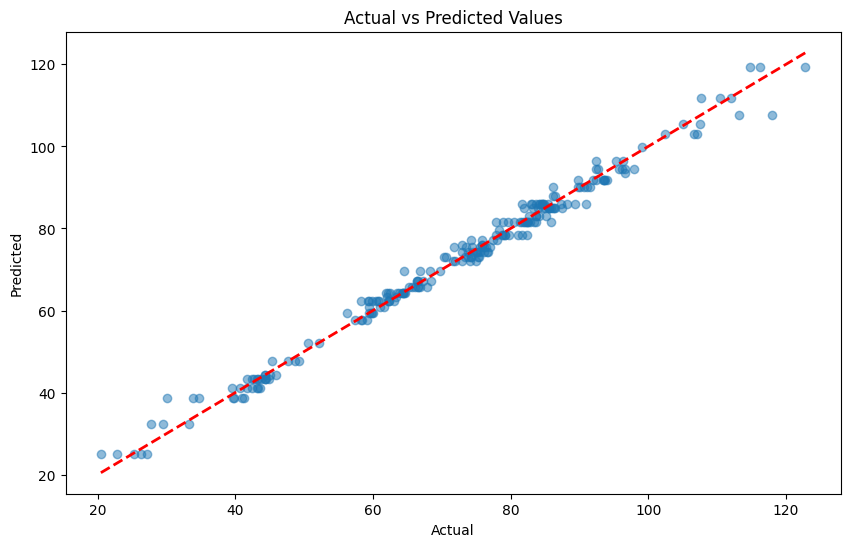

Results have been saved to Excel file 'DecisionTree_Results_DS4.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create the Decision Tree Regressor with specified best parameters
dt_regressor = DecisionTreeRegressor(max_depth=6, min_samples_leaf=14, min_samples_split=17)

# Assuming X_train, y_train, X_test, y_test are already defined
# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the test data
y_test_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('DecisionTree_Results_DS4.xlsx', index=False)

print("Results have been saved to Excel file 'DecisionTree_Results_DS4.xlsx'.")


# **SVR**

Test RMSE: 2.1649204270458604
Test MAE: 1.6054530853345066
Test MAD: 1.1327413911322566
Test MAPE: 2.3849931333955006%


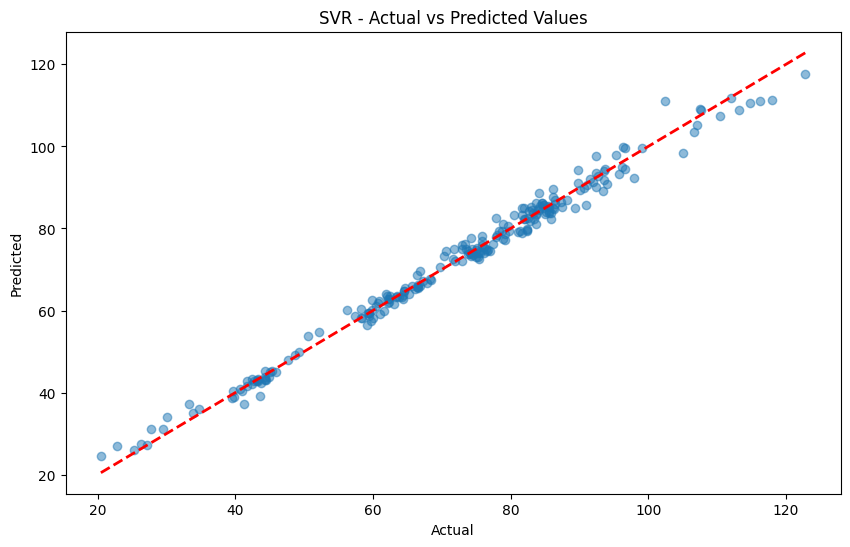

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, y_train, X_test, y_test are already defined and split
# Standardizing data - very important for SVR
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define and configure the SVR model
# Note: Hyperparameters should be chosen based on a previous analysis such as using GridSearchCV or RandomizedSearchCV
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Example parameters

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()






Random search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, ga

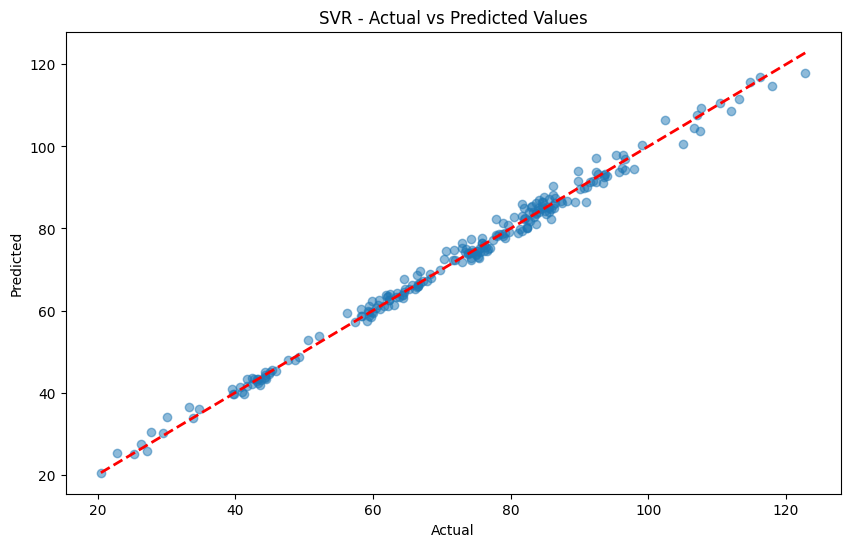

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the parameter distributions to sample from
param_dist = {
    'C': loguniform(1e-2, 1e2),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e-1),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': loguniform(1e-4, 1e-1)  # Epsilon in the epsilon-SVR model
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=SVR(kernel='rbf'),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    verbose=2,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train_scaled)

# Best model found by random search
best_model = random_search.best_estimator_

# Make predictions using the best model on the test set
y_test_pred_scaled = best_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()



Best SVR

Test RMSE: 1.7255787720417357
Test MAE: 1.3039274663046976
Test MAD: 0.973307768138902
Test MAPE: 1.8969029301053344%


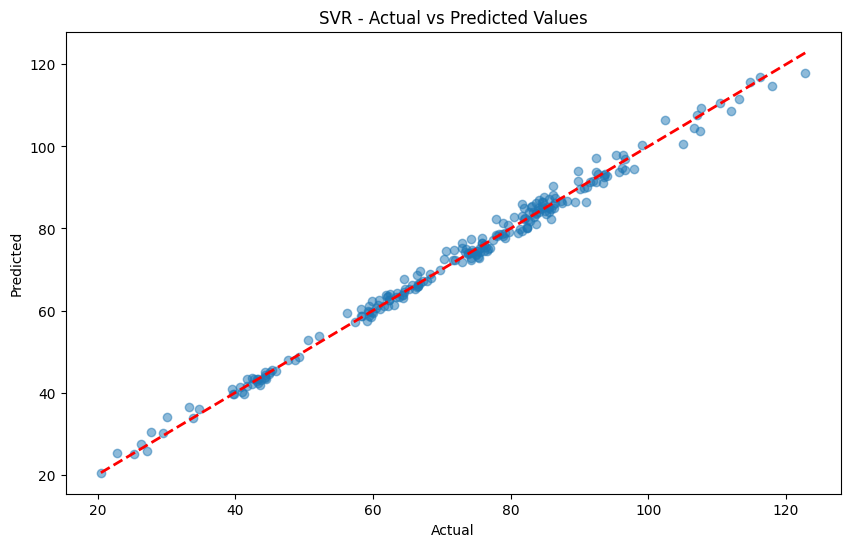

Results have been saved to Excel file 'SVR_Results_DS4.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_model = SVR(C=88.62326508576255, epsilon=0.020736445177905044, gamma=0.00039459088111000007)

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('SVR_Results_DS4.xlsx', index=False)

print("Results have been saved to Excel file 'SVR_Results_DS4.xlsx'.")

# **Stacking**

RMSE: 1.5171
MAE: 1.1563
MAD: 0.9188
MAPE: -1.6980%


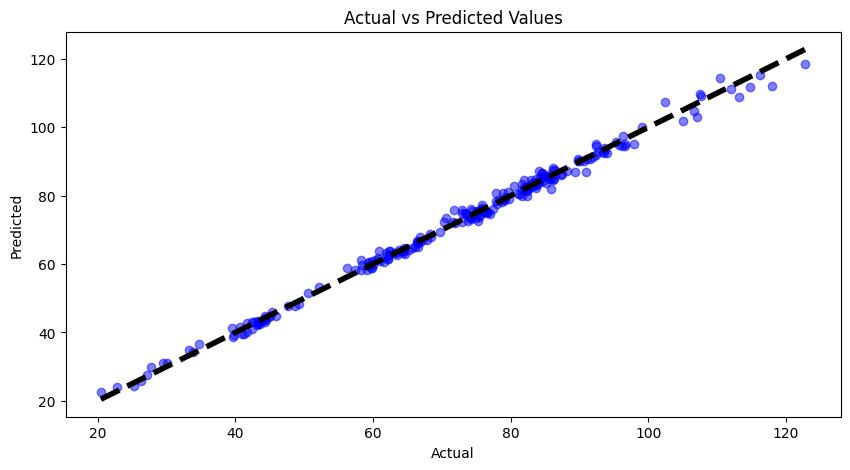

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom class to calculate MAPE, since it's not directly available in sklearn
class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        # Dummy prediction method, actual implementation is not necessary for the metric calculation
        pass

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps  # To avoid division by zero
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape  # Negative MAPE for consistency with other score methods that assume 'higher is better'

# Load or define your data here
# X_train, X_test, y_train, y_test = ...

# Decision Tree with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=14, min_samples_split=17)

# KNN with optimized parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# SVR with optimized parameters
svr = make_pipeline(StandardScaler(), SVR(C=88.623, epsilon=0.0207, gamma=0.000394))

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)  # Using the custom MAPE scorer

# Output the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_DS4.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


with PCA

RMSE: 1.5999
MAE: 1.1484
MAD: 0.8664
MAPE: -1.6479%


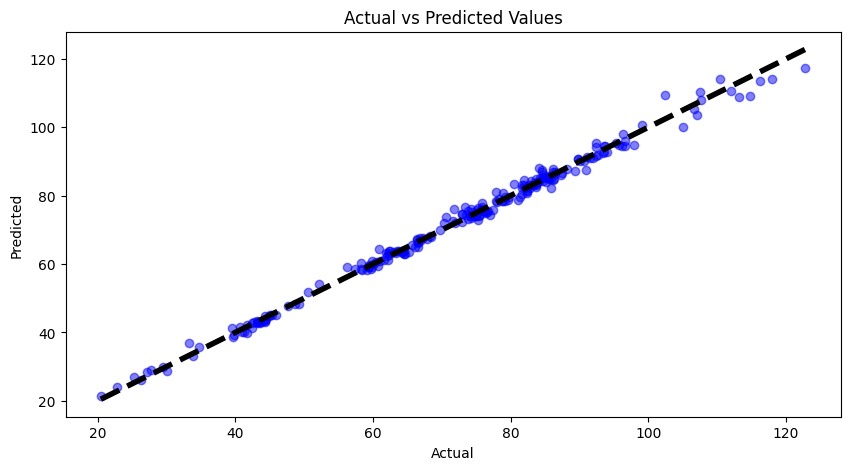

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Corrected import
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        pass  # Dummy, not used

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape

# Example data preparation
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

n_components = 15  # Number of PCA components to keep

decision_tree = make_pipeline(PCA(n_components=n_components),
                              DecisionTreeRegressor(max_depth=6, min_samples_leaf=14, min_samples_split=17))

knn = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    KNeighborsRegressor(n_neighbors=2, p=2, weights='distance'))

svr = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    SVR(C=88.623, epsilon=0.0207, gamma=0.000394))

stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_with PCA_DS4.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



# **Deep Learning**

In [ ]:
# normalize your data for GRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_df)

In [ ]:
lag = 24  # Number of hours to use as input to predict the next hour
n_obs = 908  # Adjust this if needed based on your dataset size after preprocessing
features = 31  # Total number of features included

X_train = []
y_train = []

for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])
    y_train.append(training_set_scaled[i, 0])

# Convert lists to numpy arrays for training the GRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)

(884, 24, 31)


# **GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first GRU layer with 200 units
model.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second GRU layer with 100 units
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last GRU layer with 50 units
model.add(GRU(units=50))  # This is the last GRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 24, 200)           139800    
                                                                 
 dropout_14 (Dropout)        (None, 24, 200)           0         
                                                                 
 gru_15 (GRU)                (None, 24, 100)           90600     
                                                                 
 dropout_15 (Dropout)        (None, 24, 100)           0         
                                                                 
 gru_16 (GRU)                (None, 24, 50)            22800     
                                                                 
 dropout_16 (Dropout)        (None, 24, 50)            0         
                                                                 
 gru_17 (GRU)                (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
28/28 [==============================] - 12s 89ms/step - loss: 0.0657
Epoch 2/50
28/28 [==============================] - 4s 131ms/step - loss: 0.0448
Epoch 3/50
28/28 [==============================] - 2s 85ms/step - loss: 0.0462
Epoch 4/50
28/28 [==============================] - 2s 87ms/step - loss: 0.0419
Epoch 5/50
28/28 [==============================] - 2s 86ms/step - loss: 0.0417
Epoch 6/50
28/28 [==============================] - 4s 132ms/step - loss: 0.0415
Epoch 7/50
28/28 [==============================] - 3s 104ms/step - loss: 0.0405
Epoch 8/50
28/28 [==============================] - 2s 85ms/step - loss: 0.0395
Epoch 9/50
28/28 [==============================] - 4s 136ms/step - loss: 0.0398
Epoch 10/50
28/28 [==============================] - 3s 95ms/step - loss: 0.0405
Epoch 11/50
28/28 [==============================] - 3s 118ms/step - loss: 0.0402
Epoch 12/50
28/28 [==============================] - 2s 87ms/step - loss: 0.0416
Epoch 13/50
28/28 [============

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 [==============================] - 1s 24ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure itd for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.0909
MAE: 15.7275
MAD: 15.7505
MAPE: 28.4735%
R-squared: -0.0044


Random search

In [ ]:
pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Function to create the model, adjusted for use with Scikeras
def create_model(gru_units1=200, gru_units2=100, gru_units3=50, gru_units4=50, dropout_rate=0.1):
    model = Sequential([
        GRU(units=gru_units1, return_sequences=True, input_shape=(None, 31)),  # Modify '30' to match your feature count
        Dropout(rate=dropout_rate),
        GRU(units=gru_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units4),
        Dropout(rate=dropout_rate),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras
model = KerasRegressor(model=create_model, epochs=5, batch_size=32)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'model__gru_units1': [100, 200, 300],
    'model__gru_units2': [50, 100, 150],
    'model__gru_units3': [25, 50, 75],
    'model__gru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 312ms/step - loss: 0.1091
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - loss: 0.0465
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.0359
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - loss: 0.0455
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - loss: 0.0422
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  55.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.1286
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0438
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0503
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0423
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 0.0466
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  30.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - loss: 0.0935
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0505
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0449
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0451
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0448
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  24.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.1109
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0576
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0482
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0508
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0488
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  17.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.1860
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0569
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0564
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0531
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0565
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  14.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.2378
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0667
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0533
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0537
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0535
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  15.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.1352
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0472
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0421
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0399
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0413
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  21.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.1058
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0580
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0503
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0510
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0462
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  22.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.1728
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0538
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0448
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0501
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0466
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  19.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.1358
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0498
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0501
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0472
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0439
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  20.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.1263
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0573
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0537
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0462
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0484
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  19.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0903
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0524
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0483
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0432
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0465
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  19.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.2457
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0604
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0581
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0567
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - loss: 0.0488
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.2345
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0677
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0635
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0616
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0670
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  27.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.1822
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0667
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0616
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0606
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0550
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  20.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.1424
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0596
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0492
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0488
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0429
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  21.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.1152
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0509
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 0.0519
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0567
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0475
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  22.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.1621
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0521
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0548
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0560
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0470
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  25.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.1937
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0492
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 0.0496
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0575
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0570
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  22.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.1676
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0684
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0592
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0633
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0567
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  23.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.1886
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0650
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0550
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0561
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0522
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  22.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.1422
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0460
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0422
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0502
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0468
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  27.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.1972
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0462
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0461
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0486
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0455
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  24.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.1409
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0467
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0435
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0453
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0415
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  21.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.2979
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0604
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0577
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0551
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0518
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  33.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.1992
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0652
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0605
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0512
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0541
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  29.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - loss: 0.1700
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - loss: 0.0554
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0549
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0607
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0482
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  33.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 0.1899
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0731
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0603
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0498
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0511
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  23.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.1427
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0894
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0669
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0761
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0602
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  23.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.1630
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0747
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0616
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0562
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0549
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  25.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.1304
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0578
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0586
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0532
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0485
Best parameters found:  {'model__gru_units4': 50, 'model__gru_units3': 25, 'model__gru_units2': 150, 'model__gru_units1': 200, 'model__dropout_rate': 0.5}
Best score (neg_mean_squared_error): -0.038256562232460656


In [ ]:
X_train.shape

(934, 24, 31)

Best GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
model = Sequential()
# Define the best parameters
best_params = {
    'gru_units1': 200,
    'gru_units2': 150,
    'gru_units3': 25,
    'gru_units4': 50,
    'dropout_rate': 0.5
}

# Create the GRU model with the best parameters
def create_best_model():
    model = Sequential([
        Input(shape=(24, 31)),
        GRU(units=best_params['gru_units1'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units2'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units3'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units4']),
        Dropout(best_params['dropout_rate']),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
model = create_best_model()

# Print the model summary
model.summary()



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_124 (GRU)                        │ (None, 24, 200)             │         139,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_125 (GRU)                        │ (None, 24, 150)             │         158,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 24, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_126 (GRU)                        │ (None, 24, 25)              │          13,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 24, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_127 (GRU)                        │ (None, 50)                  │          11,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,076 (1.23 MB)

 Trainable params: 323,076 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.1375
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0739
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0602
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0489
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - loss: 0.0509
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - loss: 0.0458
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0461
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0431
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0452
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0465
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0476
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0429
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0417
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0464
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - lo

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.0673
MAE: 16.1711
MAD: 16.1896
MAPE: 27.8677%
R-squared: -0.0020


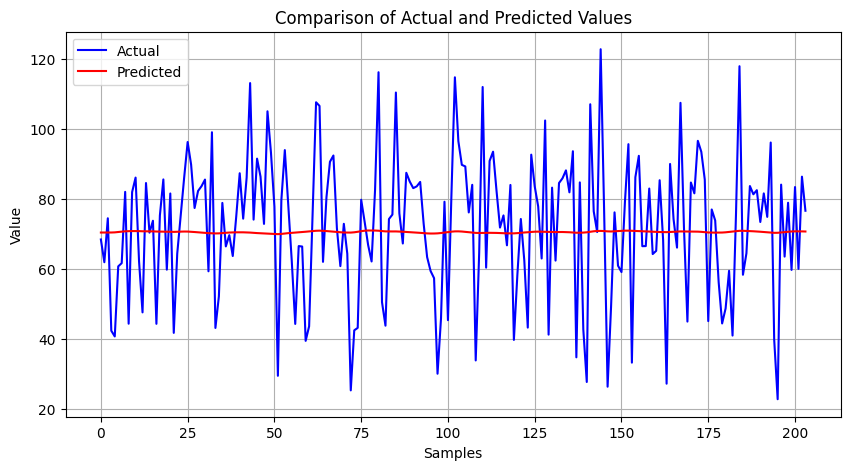

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('GRU_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first LSTM layer with 200 units
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third LSTM layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last LSTM layer with 50 units
model.add(LSTM(units=50))  # This is the last LSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0963
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0475
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0391
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0417
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0426
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0376
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0372
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0396
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0368
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0405
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0359
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0391
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0385
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0376
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0388

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.3065
MAE: 15.6981
MAD: 15.7014
MAPE: 29.0442%
R-squared: -0.0260


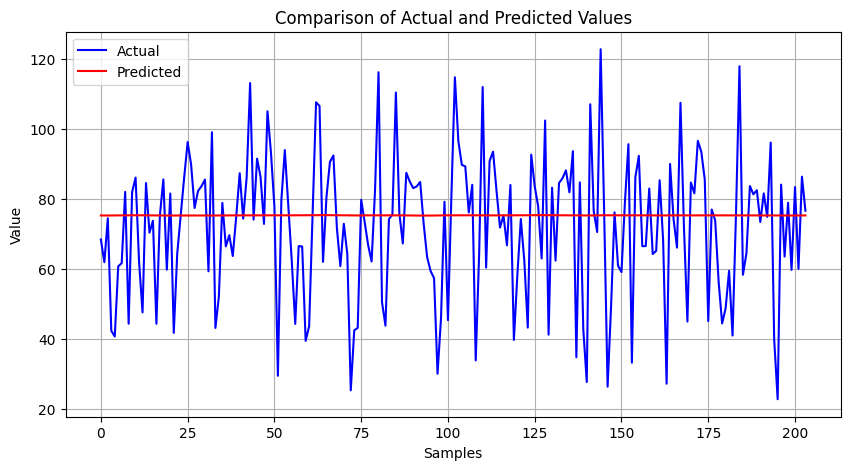

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Random search

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_model(lstm_units1=200, lstm_units2=100, lstm_units3=50, lstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        LSTM(units=lstm_units1, return_sequences=True, input_shape=(24, 31)),  # Adjusted input_shape to match X_train
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units4),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for Randomized Search
param_dist = {
    'model__lstm_units1': [100, 200],
    'model__lstm_units2': [50, 100],
    'model__lstm_units3': [25, 50, 75],
    'model__lstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  12.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  19.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  18.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  16.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  19.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  19.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  17.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  12.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__lstm_units4': 50, 'model__lstm_units3': 25, 'model__lstm_units2': 50, 'model__lstm_units1': 200, 'model__dropout_rate': 0.2}
Best score (neg_mean_squared_error): -0.037003073785168906


Best LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_optimized_model():
    model = Sequential([
        LSTM(units=200, return_sequences=True, input_shape=(24, 31)),  # First LSTM layer with 100 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=50, return_sequences=True),  # Second LSTM layer with 50 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=25, return_sequences=True),  # Third LSTM layer with 25 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=50),  # Fourth LSTM layer with 25 units
        Dropout(rate=0.2),  # Dropout for regularization
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the optimized model
model = build_optimized_model()

# Model summary
print(model.summary())


model.fit(X_train, y_train, epochs=50, batch_size=32)




Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                      │ (None, 24, 200)             │         185,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_256 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_129 (LSTM)                      │ (None, 24, 50)              │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_257 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_130 (LSTM)                      │ (None, 24, 25)              │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_258 (Dropout)                │ (None, 24, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_131 (LSTM)                      │ (None, 50)                  │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_259 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,651 (1010.36 KB)

 Trainable params: 258,651 (1010.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - loss: 0.0884
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0424
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0421
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0419
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0392
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0400
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0380
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0347
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0388
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0400
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0418
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0421
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0395
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0404
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.0647
MAE: 15.8182
MAD: 15.8209
MAPE: 28.2990%
R-squared: -0.0018


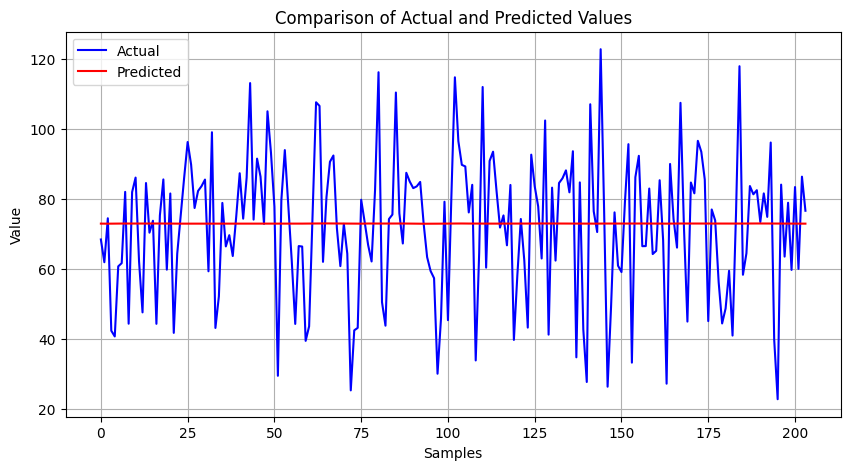

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('LSTM_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BILSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiLSTM layer with 200 units
model.add(Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiLSTM layer with 100 units
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiLSTM layer with 50 units, return_sequences=True allows stacking another BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiLSTM layer with 50 units
model.add(Bidirectional(LSTM(units=50)))  # This is the last BiLSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 400)             │         371,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_260 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 24, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_261 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 24, 100)             │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_262 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_263 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,901 (3.56 MB)

 Trainable params: 932,901 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - loss: 0.1381
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0420
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0385
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0384
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 0.0426
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0411
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 0.0377
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - loss: 0.0416
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - loss: 0.0375
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0396
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.0386
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0362
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - loss: 0.0410
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 0.0412
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.2112
MAE: 15.6424
MAD: 15.7042
MAPE: 28.9255%
R-squared: -0.0164


Random search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bilstm_units1=200, bilstm_units2=100, bilstm_units3=50, bilstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(LSTM(units=bilstm_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units4)),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bilstm_units1': [100, 200],
    'model__bilstm_units2': [50, 100],
    'model__bilstm_units3': [25, 50, 75],
    'model__bilstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  36.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  36.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  36.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  37.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  36.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  35.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  34.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  36.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  37.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  35.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  35.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  33.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  36.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  36.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  37.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  27.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  33.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  25.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  24.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  36.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  36.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  36.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.2, 'model__bilstm_units4': 25, 'model__bilstm_units3': 25, 'model__bilstm_units2': 50, 'model__bilstm_units1': 200}
Best score (neg_mean_squared_error): -0.03719451878374431


Best BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Setting up the model with the best parameters
model = Sequential([
    Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(24, 31)),  # First BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the first layer
    Bidirectional(LSTM(units=50, return_sequences=True)),  # Second BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the second layer
    Bidirectional(LSTM(units=25, return_sequences=True)),  # Third BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the third layer
    Bidirectional(LSTM(units=25)),  # Fourth and last BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the last layer
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_128 (Bidirectional)    │ (None, 24, 400)             │         371,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_388 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_129 (Bidirectional)    │ (None, 24, 100)             │         180,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_389 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_130 (Bidirectional)    │ (None, 24, 50)              │          25,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_390 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_131 (Bidirectional)    │ (None, 50)                  │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_391 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,051 (2.26 MB)

 Trainable params: 592,051 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - loss: 0.0832
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - loss: 0.0427
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 0.0433
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - loss: 0.0406
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0396
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 0.0391
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - loss: 0.0381
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0365
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - loss: 0.0429
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0372
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 0.0405
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 0.0369
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 0.0384
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0379
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 21

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.0299
MAE: 15.9100
MAD: 15.9318
MAPE: 28.1340%
R-squared: 0.0017


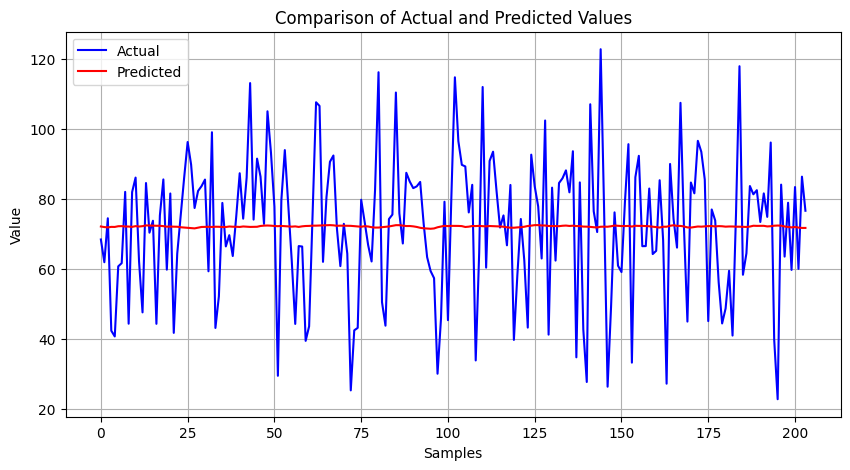

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BILSTM_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BIGRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiGRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiGRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiGRU layer with 50 units, return_sequences=True allows stacking another BiGRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiGRU layer with 50 units
model.add(Bidirectional(GRU(units=50)))  # This is the last BiGRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 400)             │         279,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 24, 200)             │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 24, 100)             │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 702,101 (2.68 MB)

 Trainable params: 702,101 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - loss: 0.2221
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 0.0461
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - loss: 0.0400
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - loss: 0.0413
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - loss: 0.0392
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - loss: 0.0362
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - loss: 0.0402
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - loss: 0.0389
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - loss: 0.0427
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 0.0378
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - loss: 0.0383
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 0.0388
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - loss: 0.0358
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - loss: 0.0412
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 221m

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.1769
MAE: 16.1536
MAD: 16.1292
MAPE: 30.8355%
R-squared: -0.1159


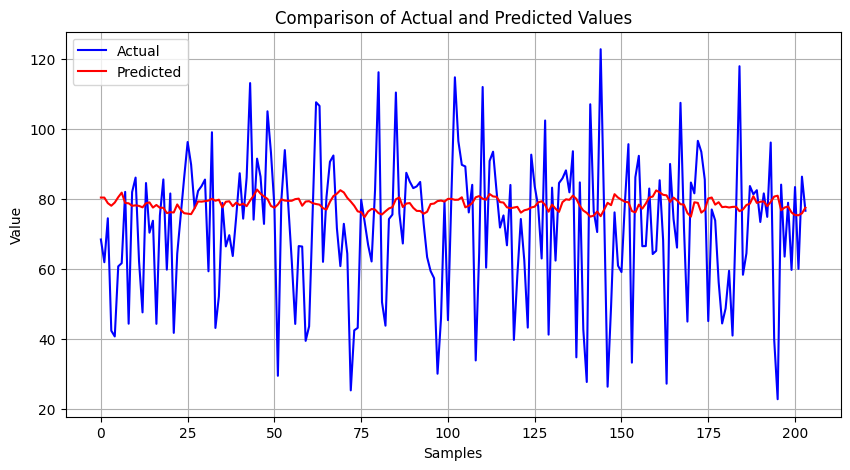

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bigru_units1=200, bigru_units2=100, bigru_units3=50, bigru_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(GRU(units=bigru_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units4)),  # This last GRU layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bigru_units1': [100, 200],
    'model__bigru_units2': [50, 100],
    'model__bigru_units3': [25, 50, 75],
    'model__bigru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  41.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  40.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  37.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  42.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  39.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  43.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  48.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  41.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  43.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  42.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  40.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  31.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  30.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  35.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  41.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  44.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  43.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  30.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  46.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  37.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.2, 'model__bigru_units4': 25, 'model__bigru_units3': 25, 'model__bigru_units2': 100, 'model__bigru_units1': 200}
Best score (neg_mean_squared_error): -0.037936050411575786


Best BIGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Create the model with the optimized parameters
model = Sequential([
    Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=25, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=25)),
    Dropout(rate=0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Fit the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_128 (Bidirectional)    │ (None, 24, 400)             │         279,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_129 (Bidirectional)    │ (None, 24, 200)             │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_130 (Bidirectional)    │ (None, 24, 50)              │          34,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_131 (Bidirectional)    │ (None, 50)                  │          11,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_131 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 626,451 (2.39 MB)

 Trainable params: 626,451 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - loss: 0.2405
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 0.0604
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.0449
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0430
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - loss: 0.0474
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 0.0452
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.0441
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0434
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - loss: 0.0423
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - loss: 0.0438
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0410
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0403
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0418
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0405
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 23

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.3789
MAE: 15.7517
MAD: 15.7643
MAPE: 29.2843%
R-squared: -0.0334


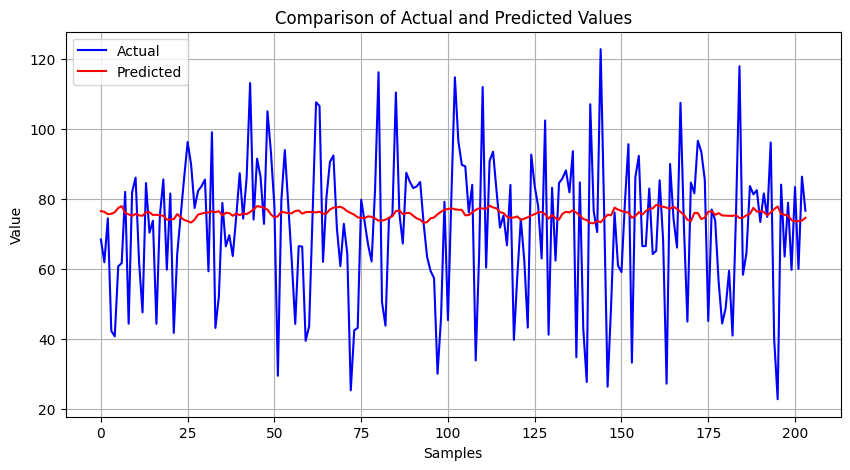

In [ ]:

import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BIGRU_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Adding max pooling to reduce dimensionality
model.add(Dropout(0.1))  # Applying 10% dropout

# Flatten the data for the dense layers
model.add(Flatten())

# Adding a dense layer
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 64)              │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_132 (Dropout)                │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_133 (Dropout)                │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 18, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,401 (763.29 KB)

 Trainable params: 195,401 (763.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3026
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0447
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0409
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0421
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0439
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0423
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0457
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0405
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0423
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0396
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0425
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0398
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0392
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0402

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8774
MAE: 17.5312
MAD: 17.9442
MAPE: 30.4226%
R-squared: -0.1909


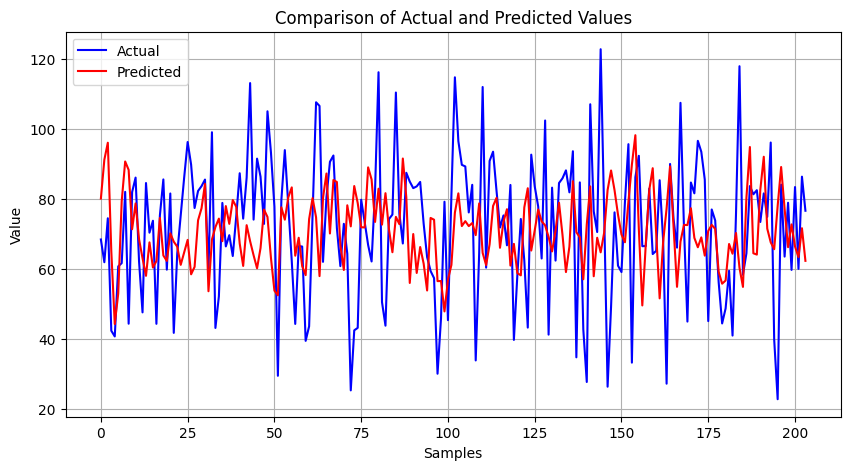

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(filters1=64, filters2=128, kernel_size1=3, kernel_size2=3, dropout_rate=0.1):
    model = Sequential([
        Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(rate=dropout_rate),
        Flatten(),
        Dense(units=100, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__filters1': [32, 64, 128],
    'model__filters2': [64, 128, 256],
    'model__kernel_size1': [3, 5],
    'model__kernel_size2': [3, 5],
    'model__dropout_rate': [0.1, 0.2, 0.3]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   2.6s
[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Best parameters found:  {'model__kernel_size2': 3, 'model__kernel_size1': 3, 'model__filters2': 128, 'model__filters1': 32, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.041106908259312895


Best CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Constructing the model with the optimal parameters
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(24, 31)),
    Dropout(rate=0.1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(rate=0.1),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dropout(rate=0.1),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Optionally, train the model with your training data
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_65 (Conv1D)                   │ (None, 22, 32)              │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_229 (Dropout)                │ (None, 22, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_66 (Conv1D)                   │ (None, 20, 128)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_230 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 100)                 │         128,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_231 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,625 (561.04 KB)

 Trainable params: 143,625 (561.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2110
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0485 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0422
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0399
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0408
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0401
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0390
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0382
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0390
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0412
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0398
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0397
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0388
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0408
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408
Epo

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.2703
MAE: 16.7509
MAD: 17.4372
MAPE: 29.9797%
R-squared: -0.1258


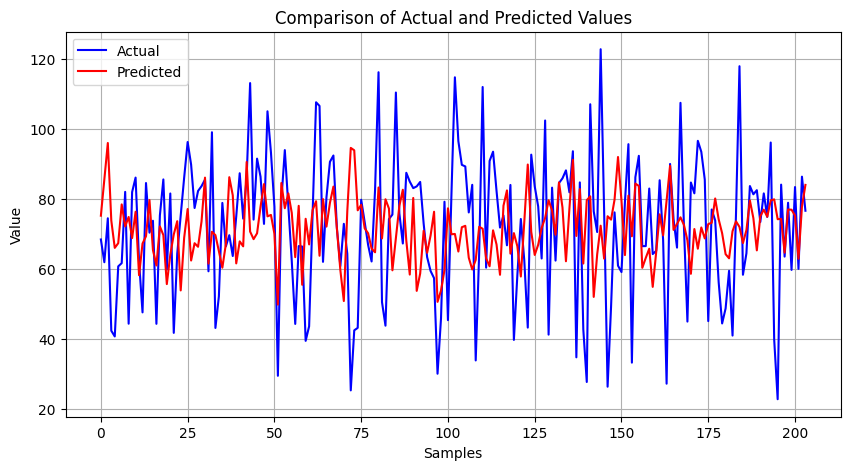

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('CNN_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential

# Assuming X_train is shaped (samples, timesteps, features)
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]
encoding_dim = 32  # Desired dimensionality of encoded representation

# Encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = Bidirectional(LSTM(200, return_sequences=True))(inputs)  # First BiLSTM layer with 200 units
encoded = Dropout(0.2)(encoded)  # Dropout rate of 0.2
encoded = Bidirectional(LSTM(50, return_sequences=False))(encoded)  # Second BiLSTM layer with 50 units
encoded = Dropout(0.2)(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)  # Encoder output

# Decoder
decoded = RepeatVector(timesteps)(encoder_output)
decoded = Bidirectional(LSTM(50, return_sequences=True))(decoded)  # First BiLSTM layer in decoder
decoded = Dropout(0.2)(decoded)
decoded = Bidirectional(LSTM(200, return_sequences=True))(decoded)  # Second BiLSTM layer in decoder, mirroring the first encoder layer
decoded = Dropout(0.2)(decoded)
decoder_output = TimeDistributed(Dense(input_dim))(decoded)

# Create and compile the autoencoder model
autoencoder = Model(inputs, decoder_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=2, batch_size=32)

# Extract encoded features using the encoder part of the autoencoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)
encoded_X_train = encoder_model.predict(X_train)

# BiLSTM model setup, using encoding_dim from the autoencoder
bilstm_model = Sequential([
    Bidirectional(LSTM(200, return_sequences=True), input_shape=(timesteps, encoding_dim)),  # First BiLSTM layer
    Dropout(0.2),
    Bidirectional(LSTM(50, return_sequences=True)),  # Second BiLSTM layer
    Dropout(0.2),
    Bidirectional(LSTM(25, return_sequences=True)),  # Third BiLSTM layer
    Dropout(0.2),
    Bidirectional(LSTM(25, return_sequences=False)),  # Fourth BiLSTM layer, not returning sequences for final output
    Dropout(0.2),
    Dense(1)
])

# Compile and train the BiLSTM model on the encoded features
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')
bilstm_model.summary()  # Summarize the model structure

# Train the BiLSTM model
bilstm_model.fit(encoded_X_train, y_train, epochs=2, batch_size=32)




Epoch 1/2
28/28 [==============================] - 34s 355ms/step - loss: 0.0758
Epoch 2/2
28/28 [==============================] - 3s 39ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirecti  (None, 24, 400)           372800    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 24, 400)           0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 24, 100)           180400    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 24, 100)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 24, 50)

7/7 [==============================] - 7s 84ms/step
RMSE: 20.4161
MAE: 16.6394
MAD: 16.6394
MAPE: 27.5764%
R-squared: -0.0372


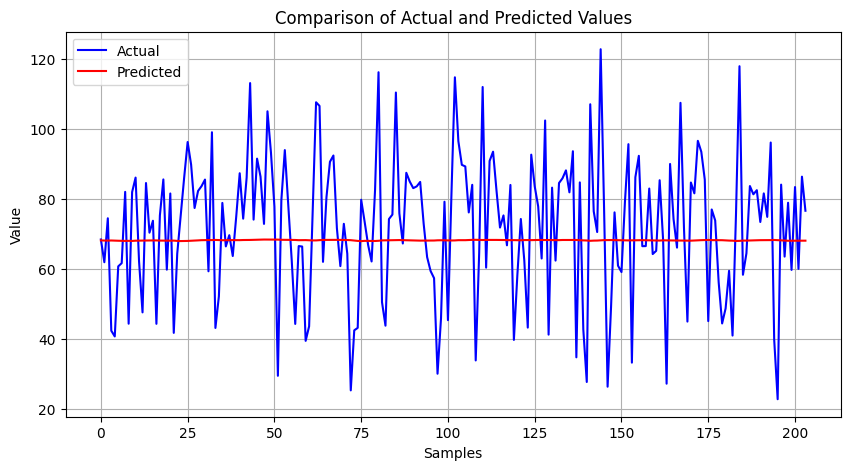

Results saved to Excel successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming sc is an already fitted MinMaxScaler instance
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
lag = 24  # Number of time steps to use as input
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Assuming autoencoder and bigru_model are already trained and encoder_model is defined as before
# Transform the test set using the encoder part of the autoencoder
encoded_X_test = encoder_model.predict(X_test)

# Make predictions using the BiGRU model on the encoded test set
y_pred = bilstm_model.predict(encoded_X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Apply inverse transform to predictions
# Apply inverse transform to predictions
pred_full = np.zeros((y_pred_reshaped.shape[0], test_features_scaled.shape[1]))  # Correct dimension
pred_full[:, 0] = y_pred_reshaped.ravel()  # Assuming the target is the first column
y_pred_inverse_full = sc.inverse_transform(pred_full)  # Apply inverse transform
y_pred_inverse = y_pred_inverse_full[:, 0]

# Compare against actual values
real_y = test_df['Y'].values[-len(y_pred):]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))
mae = mean_absolute_error(real_y, y_pred_inverse)
mad = np.mean(np.abs(real_y - y_pred_inverse))
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y,  # No need to flatten if it's already a 1D array
    'Predicted': y_pred_inverse.flatten()  # Flattening to ensure it's a 1D array
})

# Write the DataFrame to an Excel file
results_df.to_excel('BILSTM_Autoencoder_Results_DS4.xlsx', index=False)
print("Results saved to Excel successfully.")


# **Baysian optimization**

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch

class BiLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # First BiLSTM layer
        model.add(Bidirectional(LSTM(
            units=hp.Int('units1', min_value=150, max_value=250, step=50, default=200),
            return_sequences=True,
            input_shape=self.input_shape
        )))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.3, step=0.05, default=0.2)))

        # Second BiLSTM layer
        model.add(Bidirectional(LSTM(
            units=hp.Int('units2', min_value=40, max_value=60, step=10, default=50),
            return_sequences=True
        )))
        model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.3, step=0.05, default=0.2)))

        # Third BiLSTM layer
        model.add(Bidirectional(LSTM(
            units=hp.Int('units3', min_value=20, max_value=30, step=5, default=25),
            return_sequences=True
        )))
        model.add(Dropout(rate=hp.Float('dropout3', min_value=0.1, max_value=0.3, step=0.05, default=0.2)))

        # Fourth BiLSTM layer, returning sequences not necessary if connecting to a dense output layer
        model.add(Bidirectional(LSTM(
            units=hp.Int('units4', min_value=20, max_value=30, step=5, default=25),
            return_sequences=False
        )))
        model.add(Dropout(rate=hp.Float('dropout4', min_value=0.1, max_value=0.3, step=0.05, default=0.2)))

        # Output layer
        model.add(Dense(1, activation='linear'))

        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )
        return model

# Assuming you have prepared your data and determined the input shape
input_shape = X_train.shape[1:]  # e.g., (timesteps, features)

# Initialize the hypermodel
hypermodel = BiLSTMHyperModel(input_shape=input_shape)

# Set up the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=2,
    directory='bilstm_tuner',
    project_name='bilstm_tuning'
)

# Start tuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best BiLSTM Configuration: {best_hps.values}")

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)





Trial 5 Complete [00h 02m 20s]
val_mean_squared_error: 0.03918077237904072

Best val_mean_squared_error So Far: 0.03914519213140011
Total elapsed time: 00h 13m 12s
Best BiLSTM Configuration: {'units1': 200, 'dropout1': 0.2, 'units2': 60, 'dropout2': 0.2, 'units3': 20, 'dropout3': 0.15000000000000002, 'units4': 30, 'dropout4': 0.2, 'learning_rate': 0.005267900351839842}
Epoch 1/5
23/23 [==============================] - 25s 323ms/step - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 2/5
23/23 [==============================] - 6s 246ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 3/5
23/23 [==============================] - 4s 183ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 4/5
23/23 [==============================] - 5s 215ms/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0455 - val_mean_squar

7/7 [==============================] - 6s 49ms/step
RMSE: 20.2166
MAE: 15.6988
MAD: 15.7009
MAPE: 28.7611%
R-squared: -0.0170


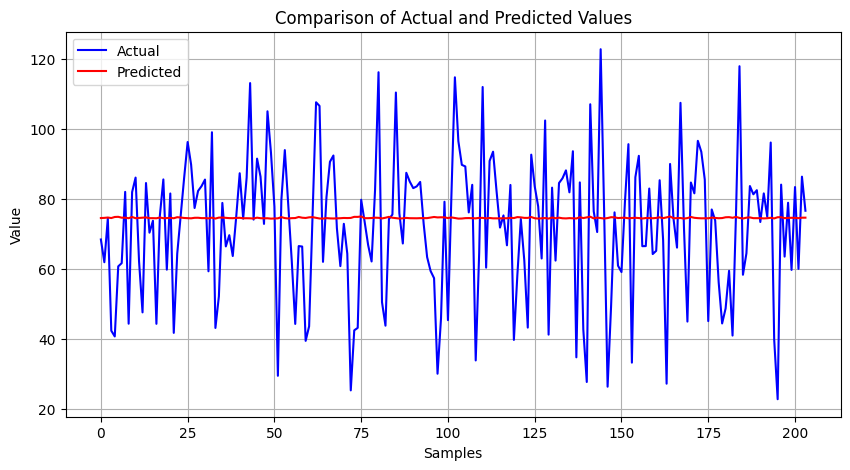

Data has been written to Excel successfully.


In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = best_model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))


import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BILSTM_Baysian_Results_DS4.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")
